# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import statistics as st
from tqdm import trange
from tqdm import tqdm
import itertools
from scipy.stats import wasserstein_distance, energy_distance
print("")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
# Save Figure
#fig.write_html('drive/My Drive/images/betweennessHist.html')

# Analyzing the Big Graph

## Loading the big graph and showing the details

In [3]:
dfBigGraph = pd.read_csv('drive/My Drive/data/CGCS-GraphData.csv')
dfBigGraph.describe()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
count,1.238953e+08,1.238953e+08,1.238953e+08,1.238953e+08,1.238953e+08,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07
mean,5.566990e+05,7.490687e-01,5.571470e+05,1.505715e+07,6.460121e+01,2.400772e+00,2.405289e+00,5.936289e-01,-3.621679e+01,6.262336e-01,-3.643658e+01
std,5.794484e+04,9.638940e-01,5.799030e+04,3.047018e+07,2.870352e+03,1.766937e+00,1.769288e+00,2.391271e+01,1.080029e+02,2.387852e+01,1.081189e+02
min,4.567590e+05,0.000000e+00,4.567590e+05,-2.702016e+09,-1.000000e+00,0.000000e+00,0.000000e+00,-3.789420e+01,-1.793750e+02,-3.789420e+01,-1.793750e+02
25%,5.066630e+05,0.000000e+00,5.071510e+05,8.212526e+06,1.000000e+00,1.000000e+00,1.000000e+00,-2.441490e+01,-1.584460e+02,-2.440350e+01,-1.588930e+02
50%,5.566020e+05,1.000000e+00,5.574750e+05,1.619336e+07,1.000000e+00,2.000000e+00,2.000000e+00,3.914150e-01,-4.081200e+01,4.157700e-01,-4.082980e+01
75%,6.065080e+05,1.000000e+00,6.073850e+05,2.410743e+07,1.000000e+00,4.000000e+00,4.000000e+00,2.379140e+01,8.754490e+01,2.374010e+01,8.736400e+01
max,6.576680e+05,6.000000e+00,6.576700e+05,3.153600e+07,8.166740e+06,5.000000e+00,5.000000e+00,4.983240e+01,1.633690e+02,4.983240e+01,1.633690e+02


In [0]:
dfBigGraph = dfBigGraph[["Source", "eType", "Target", "Time", "Weight", "SourceLocation"]]

In [0]:
#dfBigGraph = dfBigGraph[["Source", "eType", "Target"]]

In [0]:
dfBigGraph = dfBigGraph.drop_duplicates()

In [0]:
list(list())

In [0]:
#ImportantPeople = list(dfBigGraph[dfBigGraph["eType"] == 0]["Source"])

#ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 0]["Target"])
ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 1]["Source"])
ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 1]["Target"])
ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 2]["Source"])
ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 3]["Source"])
ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 4]["Source"])
ImportantPeople = ImportantPeople + list(dfBigGraph[dfBigGraph["eType"] == 6]["Source"])

In [0]:
ImportantPeople = list(dict.fromkeys(ImportantPeople))

In [0]:
len(ImportantPeople)

164534

In [0]:
np.linspace(0, 164534, num=6)

array([     0. ,  32906.8,  65813.6,  98720.4, 131627.2, 164534. ])

In [0]:
ImportantPeople[0:10]

[483619,
 564655,
 646461,
 510952,
 480538,
 463325,
 546823,
 616715,
 625210,
 465161]

In [0]:
n = 10000
ImportantPeople_top_n10k = list()
print("")
for p in tqdm(ImportantPeople[1000:2000]):
  if(len( dfBigGraph[(dfBigGraph["Source"] == p) | (dfBigGraph["Target"] == p)]) > n):
    ImportantPeople_top_n10k.append(p);

In [0]:
for p in tqdm(ImportantPeople[10000:20000]):
  if(len( dfBigGraph[(dfBigGraph["Source"] == p) | (dfBigGraph["Target"] == p)]) > n):
    ImportantPeople_top_n10k.append(p);

In [0]:
for p in tqdm(ImportantPeople[10000:20000]):
  if(len( dfBigGraph[(dfBigGraph["Source"] == p) | (dfBigGraph["Target"] == p)]) > n):
    ImportantPeople_top_n10k.append(p);

In [0]:
len(ImportantPeople_top_n10k)

243

In [0]:
dfBigGraph[(dfBigGraph["Source"] == ImportantPeople_top_n10k[6]) & 
           (dfBigGraph["Target"] == ImportantPeople_top_n10k[98])]

,Source,eType,Target
1025364,570191,0,560403
46059895,570191,1,560403
80661790,570191,0,560403
112694769,570191,1,560403


## Analyzing and plotting some of the channels for testing

### Co-Authorship channel

In [0]:
dfcoAuthor = dfBigGraph[dfBigGraph["eType"] == 4]

In [0]:
dfcoAuthor = dfcoAuthor[list(["Source", "Target", "Weight"])]

In [0]:
fig = px.scatter(dfcoAuthor, x="Source", y="Target", hover_data=['Weight'])
fig.update_layout(yaxis_type='category', xaxis_type='category',
                  title_text='Scatter plot Co-authorship in the big graph')
fig.show()

In [0]:
fig3 = px.scatter(dfcoAuthor, x="Target", y="Source", hover_data=['Weight'])
fig3.update_layout(yaxis_type='category', xaxis_type='category',
                  title_text='Scatter plot Co-authorship in the big graph')
fig3.show()

In [0]:
#import os

#if not os.path.exists("drive/My Drive/images"):
#    os.mkdir("drive/My Drive/images")

In [0]:
#import plotly.offline as offline
#offline.init_notebook_mode()

In [0]:
fig.write_html("drive/My Drive/file.html")

In [0]:
#fig.write_image("drive/My Drive/image.svg")

In [0]:
fig2 = px.density_heatmap(dfcoAuthor, x=dfcoAuthor["Source"].astype('category'), y=dfcoAuthor["Target"].astype('category'), hover_data=['Weight'], z='Weight', histfunc='sum')
#fig2.update_layout(yaxis_type='category', xaxis_type='category',
#                  title_text='Heatmap Co-authorship in the big graph')
fig2.show()

### Communication Channel

In [0]:
dfCommunication = dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]

In [0]:
dfCommunication = dfBigGraph[["Source", "Target"]][(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]
#print(dfCommunication)

In [0]:
len(dfCommunication)

119323696

In [0]:
print("The number of unique Node Id's in the whole dataset:   ", 
      len(list(dict.fromkeys((list(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Target"].drop_duplicates()) 
      + list(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Source"].drop_duplicates()))))))

In [0]:
dfX = dfBigGraph[(dfBigGraph["eType"] == 0) & (dfBigGraph["Source"] == 6.576680e+05)]

In [0]:
len(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Target"].drop_duplicates()))


5.833333333333334

In [0]:
bigGraph = nx.from_pandas_edgelist(dfBigGraph[0:30000000], "Source", "Target")

In [0]:
bigGraph.number_of_edges()

11480158

In [0]:
bigGraph.is_directed()

False

In [0]:
nx.number_connected_components(bigGraph)

1

In [0]:
nx.is_connected(bigGraph)

True

#### Simplified graph

### Travel Channel

In [0]:
dfTravel = dfBigGraph[dfBigGraph["eType"] == 6]

In [0]:
len(dfTravel)

1491998

In [0]:
len(dfTravel["SourceLongitude"].drop_duplicates())

6

In [0]:
len(dfTravel.drop_duplicates())

298481

In [0]:
dfTravel_unq = dfTravel.drop_duplicates()

In [0]:
dfTravel[dfTravel["Time"] < (48*3600)][["Source", "Target"]].drop_duplicates()

,Source,Target
122402425,557982,499467
122402914,545818,509607
122403070,547434,625756
122403897,563776,616453
122404386,632691,561157
...,...,...
122698610,546275,499467
122698655,582068,616453
122698898,627780,657173
122699082,604882,509607


In [0]:
dfTravel[(dfTravel["Time"] < (48*3600))& (dfTravel["Source"] == 557982)]

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
122402425,557982,6,499467,86400,2.0,1.0,2.0,-29.0,-13.0,-22.0,91.0
122701079,557982,6,499467,86400,2.0,1.0,2.0,-29.0,-13.0,-22.0,91.0
123000059,557982,6,499467,86400,2.0,1.0,2.0,-29.0,-13.0,-22.0,91.0
123298737,557982,6,499467,86400,2.0,1.0,2.0,-29.0,-13.0,-22.0,91.0
123597548,557982,6,499467,86400,2.0,1.0,2.0,-29.0,-13.0,-22.0,91.0


In [0]:
dfTravel_unq[(dfTravel_unq["Time"] < (48*3600))]["Source"].drop_duplicates()

122402425    557982
122402914    545818
122403070    547434
122403897    563776
122404386    632691
              ...  
122698610    546275
122698655    582068
122698898    627780
122699082    604882
122699169    458038
Name: Source, Length: 753, dtype: int64

In [0]:
dfTravel[dfTravel["Time"] < (48*3600)][["Source", "Target"]].drop_duplicates()

### Procurement Channel

In [0]:
dfProcurement = dfBigGraph[(dfBigGraph["eType"] == 2) | (dfBigGraph["eType"] == 3)]

In [0]:
len(dfProcurement["Source"].drop_duplicates())

3814

## Trying to save the whole graph in a network

In [0]:
bigGraphG = nx.DiGraph()

In [0]:
dfBigGraph[1:100]

,Source,Target
1,603100,643327
2,577847,643327
3,466246,643327
4,633499,549896
5,536338,549896
...,...,...
95,516174,625092
96,577442,625092
97,526586,625092
98,568810,625092


In [0]:
bigGraphG = nx.from_pandas_edgelist(dfBigGraph[0:10000000], source="Source", target="Target")

In [0]:
print(nx.density(bigGraphG))
print(nx.average_shortest_path_length(bigGraphG))

0.00047380144874172844


In [0]:
#bigGraphNodesTuple = [tuple([x, y]) for x, y in zip(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Source"], 
#                                                  dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Target"])]

In [0]:
#bigGraphG.add_edges_from(bigGraphNodesTuple)

In [0]:
 pip install -U memory_profiler

In [0]:
import memory_profiler
import time
def check_even(numbers):
    for num in numbers:
        if num % 2 == 0:
            yield num * num 
    
if __name__ == '__main__':
    m1 = memory_profiler.memory_usage()
    t1 = time.clock()
    cubes = check_even(range(1000000000000000000000000))
    t2 = time.clock()
    m2 = memory_profiler.memory_usage()
    time_diff = t2 - t1
    mem_diff = m2[0] - m1[0]
    print(f"It took {time_diff} Secs and {mem_diff} Mb to execute this method")

It took 2.3999999999801958e-05 Secs and 0.0 Mb to execute this method


In [0]:
bigGraphG = nx.DiGraph()

In [0]:
bigGraphTuple = [tuple([x, y]) for x, y in zip(dfGraph1["Source"], dfGraph1["Target"])]

In [0]:
import memory_profiler
import time
def add_next_edge(graph, dfdata):
  for x, y in dfdata["Source", "Target"]:
    yield graph.a



## Some extra info about the big graph

In [0]:
len(dfBigGraph[["Source", "Target"]].drop_duplicates())

116217190

# Analyzing quantitive measures for the Template and Graphs of question 1

## loading the graphs into pandas dataframes

In [0]:
dfTemplate = pd.read_csv('drive/My Drive/data/CGCS-Template.csv')
dfGraph1 = pd.read_csv('drive/My Drive/data/Q1-Graph1.csv')
dfGraph2 = pd.read_csv('drive/My Drive/data/Q1-Graph2.csv')
dfGraph3 = pd.read_csv('drive/My Drive/data/Q1-Graph3.csv')
dfGraph4 = pd.read_csv('drive/My Drive/data/Q1-Graph4.csv')
dfGraph5 = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')

### Numerical data for question 1 graphs

#### Creating the graphs

In [0]:
templateG = nx.DiGraph()
graph1G = nx.DiGraph()
graph2G = nx.DiGraph()
graph3G = nx.DiGraph()
graph4G = nx.DiGraph()
graph5G = nx.DiGraph()

In [0]:
templateG = nx.MultiDiGraph()
graph1G = nx.MultiDiGraph()
graph2G = nx.MultiDiGraph()
graph3G = nx.MultiDiGraph()
graph4G = nx.MultiDiGraph()
graph5G = nx.MultiDiGraph()

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph All channels
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1["Source"], dfGraph1["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2["Source"], dfGraph2["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3["Source"], dfGraph3["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4["Source"], dfGraph4["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5["Source"], dfGraph5["Target"])]

In [0]:
tuple(zip([1,2],[2,3],[1,2]))

((1, 2, 1), (2, 3, 2))

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph Communication channel
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Source"],
                      dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Source"], 
                                                  dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Source"], 
                                                  dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Source"], 
                                                  dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Source"], 
                                                  dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Target"])]

In [0]:
# Creating graph objects from the tuples
templateG.add_edges_from(templateNodesTuple)
graph1G.add_edges_from(graph1NodesTuple)
graph2G.add_edges_from(graph2NodesTuple)
graph3G.add_edges_from(graph3NodesTuple)
graph4G.add_edges_from(graph4NodesTuple)
graph5G.add_edges_from(graph5NodesTuple)
print("")

In [0]:
testG = nx.MultiDiGraph()

In [0]:
max([x for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])])

620120

In [0]:
a = [testG.add_edge(x, y,time = z) for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])]

In [0]:
print(min([x for y, x in list(testG.in_degree())]),
      max([x for y, x in list(testG.in_degree())]))

0 72


In [0]:
testG.degree()

DiMultiDegreeView({0: 38, -99: 1, 41: 208, 34: 93, 37: 102, 27: 98, 40: 55, 39: 116, 65: 56, 67: 54, 47: 105, 66: 5, 657187: 18, 78: 4, 81: 7, 80: 4, 70: 13, 43: 74, 56: 85, 57: 64, 58: 95, 63: 120, 77: 4, 79: 4, 45: 76, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19})

In [0]:
graph1G.degree()

DiMultiDegreeView({599956: 74, 635665: 115, 490041: 55, 589639: 35, 533140: 20, 591682: 6, 568093: 12, 616050: 15, 632150: 16, 464459: 9, 512397: 19, 550287: 12, 559657: 5, 623295: 54, 492777: 59, 570411: 20, 550361: 35, 493044: 24, 596193: 30, 640464: 21})

In [0]:
testG2 = nx.MultiDiGraph()
testTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]

In [0]:
a = testG2.add_edges_from(testTuple)

In [0]:
print(min([x for y, x in list(testG2.in_degree())]),
      max([x for y, x in list(testG2.in_degree())]))

0 72


#### heatmap

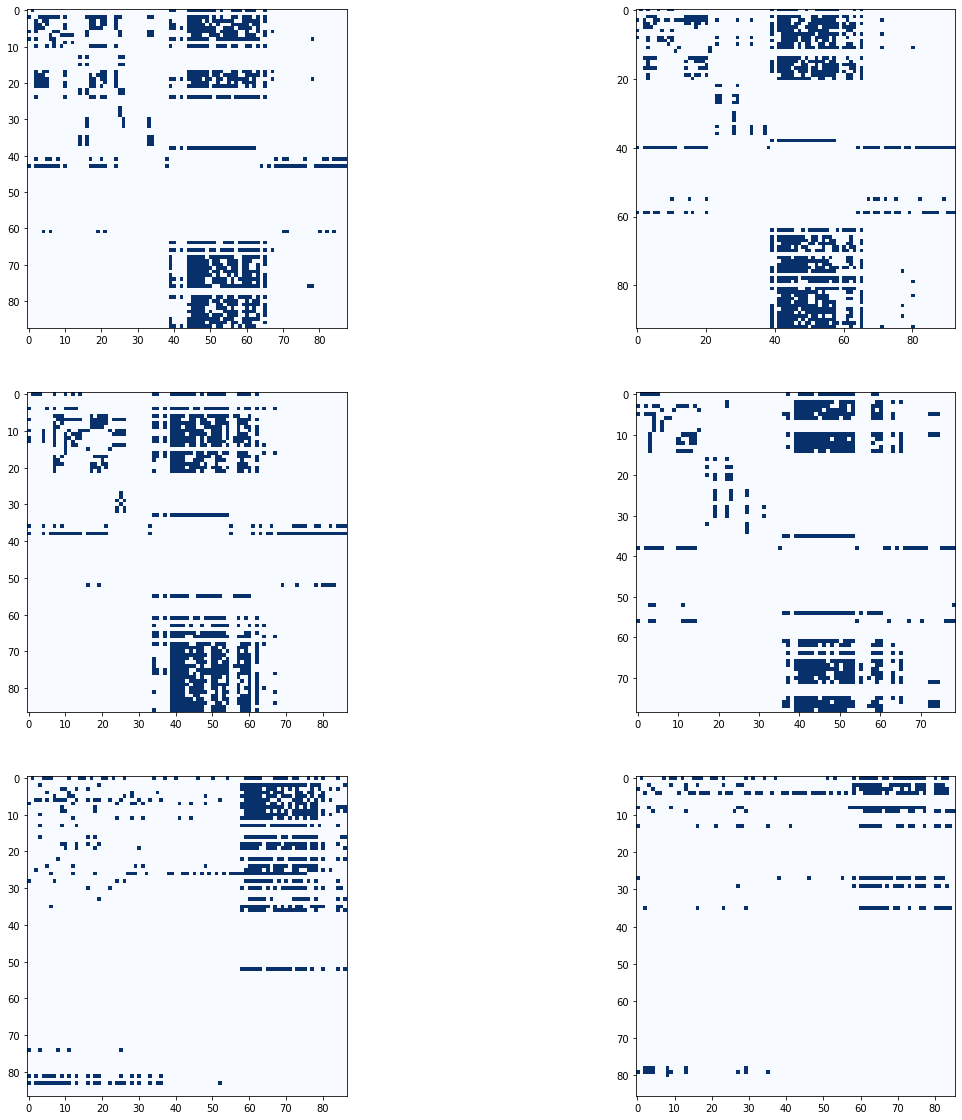

In [0]:
# nx.to_numpy_matrix(graph1G)
import matplotlib.cm as cm

# Make an array with ones in the shape of an 'X'

fig = plt.figure(figsize=(20, 20)) 

a = nx.to_numpy_matrix(templateG)
ax1 = fig.add_subplot(321)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph1G)
ax1 = fig.add_subplot(322)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph2G)
ax1 = fig.add_subplot(323)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph3G)
ax1 = fig.add_subplot(324)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph4G)
ax1 = fig.add_subplot(325)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph5G)
ax1 = fig.add_subplot(326)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)


plt.show()

#### degree

In [0]:
degreeTemplate = nx.degree(templateG)
degreeGraph1 = nx.degree(graph1G)
degreeGraph2 = nx.degree(graph2G)
degreeGraph3 = nx.degree(graph3G)
degreeGraph4 = nx.degree(graph4G)
degreeGraph5 = nx.degree(graph5G)

In [0]:
print(dict((y, x) for x, y in degreeTemplate))

{38: 0, 1: 640784, 208: 41, 93: 34, 102: 37, 98: 27, 55: 40, 116: 39, 56: 65, 54: 67, 105: 47, 5: 66, 18: 42, 4: 503218, 7: 76, 13: 644226, 74: 43, 85: 56, 64: 57, 95: 58, 120: 63, 76: 45, 10: 520660, 3: 606730, 9: 71, 6: 72, 24: 580426, 36: 620120, 30: 567195, 33: 503701, 27: 589943, 19: 64, 22: 537281, 28: 523927, 23: 31, 25: 616315, 26: 49, 21: 46, 17: 60, 20: 61, 16: 59, 14: 55}


In [0]:
print("centrality degreerange for All channel in Template: ",
      min(list(dict((x, y) for x, y in degreeTemplate).values())), 
      max(list(dict((x, y) for x, y in degreeTemplate).values())))

print("centrality degree range for All channel in graph 1: ",
      min(list(dict((x, y) for x, y in degreeGraph1).values())), 
      max(list(dict((x, y) for x, y in degreeGraph1).values())))

print("centrality degree range for All channel in graph 2: ",
      min(list(dict((x, y) for x, y in degreeGraph2).values())), 
      max(list(dict((x, y) for x, y in degreeGraph2).values())))

print("centrality degree range for All channel in graph 3: ",
      min(list(dict((x, y) for x, y in degreeGraph3).values())), 
      max(list(dict((x, y) for x, y in degreeGraph3).values())))

print("centrality degree range for All channel in graph 4: ",
      min(list(dict((x, y) for x, y in degreeGraph4).values())), 
      max(list(dict((x, y) for x, y in degreeGraph4).values())))

print("centrality degree range for All channel in graph 5: ",
      min(list(dict((x, y) for x, y in degreeGraph5).values())), 
      max(list(dict((x, y) for x, y in degreeGraph5).values())))

centrality degreerange for All channel in Template:  1 208
centrality degree range for All channel in graph 1:  1 135
centrality degree range for All channel in graph 2:  1 192
centrality degree range for All channel in graph 3:  1 68
centrality degree range for All channel in graph 4:  1 64
centrality degree range for All channel in graph 5:  1 72


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Ego Network: 
  * represent the network of the node with the largest degree in the network 

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 19
Average in degree:   0.9500
Average out degree:   0.9500


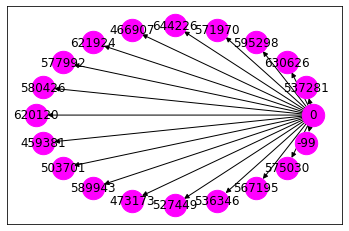

In [0]:
ego_net = nx.ego_graph(templateG, n=0)
print(nx.info(ego_net))
fig = plt.Figure(figsize=(30,30))
pos=nx.shell_layout(ego_net)

nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')

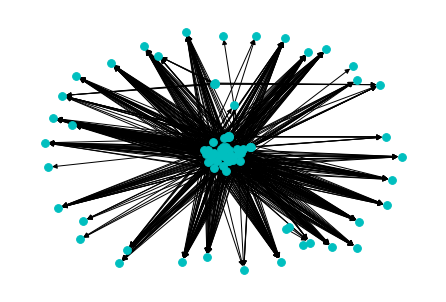

number of nodes:  88
number of edges:  859


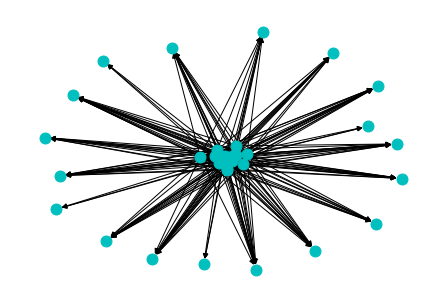

In [0]:
fig = plt.Figure(figsize=(30,30))
# Copy a graph model
G = templateG
# Let's draw the graph
pos= nx.spring_layout(G)
nx.draw(G, pos, node_color='c', node_size=60 ,with_labels=False)
plt.show()
# find node with largest degree
node_degree = G.degree()
# calculate number of nodes
print("number of nodes: ", G.order())
# calculate number of edges
print("number of edges: ", G.size())
# find node with the largest degree
node_degree= G.degree()
series = pd.Series(dict(node_degree))
largest_deg = series.idxmax()
degree = series.max()
# Create ego graph of node with the largest degree
node_ego= nx.ego_graph(G,largest_deg)
# Draw ego graph
pos= nx.spring_layout(node_ego)
nx.draw(node_ego, pos, node_color='c', node_size=120, with_labels=False)
plt.show()

In [0]:
#TODO
#Add the Ego Network with two hops

#### 

In [0]:
max([y for x, y in node_degree])

47

In [0]:
series = pd.Series(dict(node_degree))
series.idxmax()
series.max()

47

In [0]:
node_degree

DiDegreeView({0: 23, -99: 1, 41: 47, 34: 34, 37: 35, 27: 38, 40: 31, 39: 29, 65: 30, 67: 5, 47: 37, 66: 1, 657187: 2, 78: 4, 81: 7, 80: 4, 70: 13, 43: 36, 56: 36, 57: 35, 58: 34, 63: 37, 77: 4, 79: 4, 45: 40, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19})

#### Centrality Degree

In [0]:
degree_centralityTemplate = nx.degree_centrality(templateG)
degree_centralityGraph1 = nx.degree_centrality(graph1G)
degree_centralityGraph2 = nx.degree_centrality(graph2G)
degree_centralityGraph3 = nx.degree_centrality(graph3G)
degree_centralityGraph4 = nx.degree_centrality(graph4G)
degree_centralityGraph5 = nx.degree_centrality(graph5G)

In [0]:
print(degree_centralityGraph5)

{619322: 0.8470588235294118, 590442: 0.011764705882352941, 594308: 0.5882352941176471, 549840: 0.32941176470588235, 524153: 0.6235294117647059, 629769: 0.011764705882352941, 461577: 0.011764705882352941, 547205: 0.011764705882352941, 483784: 0.5764705882352941, 631903: 0.32941176470588235, 549891: 0.047058823529411764, 632485: 0.011764705882352941, 657173: 0.11764705882352941, 477657: 0.6235294117647059, 620947: 0.011764705882352941, 492039: 0.023529411764705882, 616453: 0.3529411764705882, 483999: 0.023529411764705882, 644754: 0.011764705882352941, 525263: 0.011764705882352941, 532852: 0.011764705882352941, 625756: 0.11764705882352941, 517649: 0.011764705882352941, 509607: 0.29411764705882354, 587437: 0.011764705882352941, 623736: 0.011764705882352941, 493358: 0.03529411764705882, 561819: 0.38823529411764707, 561157: 0.3529411764705882, 530990: 0.32941176470588235, 643087: 0.011764705882352941, 569044: 0.011764705882352941, 556592: 0.011764705882352941, 585589: 0.011764705882352941, 5

In [0]:
print("centrality degree range for All channel in Template: ",
      min(list(degree_centralityTemplate.values())), 
      max(list(degree_centralityTemplate.values())))

print("centrality degree range for All channel in graph 1: ",
      min(list(degree_centralityGraph1.values())), 
      max(list(degree_centralityGraph1.values())))

print("centrality degree range for All channel in graph 2: ",
      min(list(degree_centralityGraph2.values())), 
      max(list(degree_centralityGraph2.values())))

print("centrality degree range for All channel in graph 3: ",
      min(list(degree_centralityGraph3.values())), 
      max(list(degree_centralityGraph3.values())))

print("centrality degree range for All channel in graph 4: ",
      min(list(degree_centralityGraph4.values())), 
      max(list(degree_centralityGraph4.values())))

print("centrality degree range for All channel in graph 5: ",
      min(list(degree_centralityGraph5.values())), 
      max(list(degree_centralityGraph5.values())))

centrality degree range for All channel in Template:  0.3125 11.6875
centrality degree range for All channel in graph 1:  0.2631578947368421 6.052631578947368
centrality degree range for All channel in graph 2:  0.8823529411764706 10.058823529411764
centrality degree range for All channel in graph 3:  0.6923076923076923 3.384615384615385
centrality degree range for All channel in graph 4:  0.02631578947368421 0.5263157894736842
centrality degree range for All channel in graph 5:  0.3333333333333333 0.8888888888888888


In [0]:
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate], [x for x, y in degree_centralityTemplate])))
#[y for x, y in degree_centralityTemplate.items()]
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))

In [0]:
fig = make_subplots(rows=3, cols=2)

numberOfBins = 6
# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph1.items()], [x for x, y in degree_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph2.items()], [x for x, y in degree_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph3.items()], [x for x, y in degree_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph4.items()], [x for x, y in degree_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph5.items()], [x for x, y in degree_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=numberOfBins)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

numberOfBins = 6

df = pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph1.items()], [x for x, y in degree_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph2.items()], [x for x, y in degree_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph3.items()], [x for x, y in degree_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph4.items()], [x for x, y in degree_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph5.items()], [x for x, y in degree_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Closeness Centrality

In [0]:
closeness_centralityTemplate = nx.closeness_centrality(templateG)
closeness_centralityGraph1 = nx.closeness_centrality(graph1G)
closeness_centralityGraph2 = nx.closeness_centrality(graph2G)
closeness_centralityGraph3 = nx.closeness_centrality(graph3G)
closeness_centralityGraph4 = nx.closeness_centrality(graph4G)
closeness_centralityGraph5 = nx.closeness_centrality(graph5G)

In [0]:
print(closeness_centralityGraph5)
sum(list(closeness_centralityTemplate.values()))

{619322: 0.08067226890756302, 590442: 0.05847750865051903, 594308: 0.05841784989858012, 549840: 0.06776470588235294, 524153: 0.06515837104072399, 629769: 0.050980392156862744, 461577: 0.050980392156862744, 547205: 0.05847750865051903, 483784: 0.08067226890756302, 631903: 0.08067226890756302, 549891: 0.05847750865051903, 632485: 0.050980392156862744, 657173: 0.05847750865051903, 477657: 0.07365728900255754, 620947: 0.050980392156862744, 492039: 0.06855983772819474, 616453: 0.08284313725490196, 483999: 0.06855983772819474, 644754: 0.050980392156862744, 525263: 0.050980392156862744, 532852: 0.05847750865051903, 625756: 0.07100840336134455, 517649: 0.050980392156862744, 509607: 0.07647058823529412, 587437: 0.050980392156862744, 623736: 0.050980392156862744, 493358: 0.05847750865051903, 561819: 0.08916408668730649, 561157: 0.07647058823529412, 530990: 0.08916408668730649, 643087: 0.050980392156862744, 569044: 0.05847750865051903, 556592: 0.050980392156862744, 585589: 0.050980392156862744, 5

13.462339002338013

In [0]:
print("centrality closeness range for All channel in Template: ",
      min(list(closeness_centralityTemplate.values())), 
      max(list(closeness_centralityTemplate.values())))

print("centrality closeness range for All channel in graph 1: ",
      min(list(closeness_centralityGraph1.values())), 
      max(list(closeness_centralityGraph1.values())))

print("centrality closeness range for All channel in graph 2: ",
      min(list(closeness_centralityGraph2.values())), 
      max(list(closeness_centralityGraph2.values())))

print("centrality closeness range for All channel in graph 3: ",
      min(list(closeness_centralityGraph3.values())), 
      max(list(closeness_centralityGraph3.values())))

print("centrality closeness range for All channel in graph 4: ",
      min(list(closeness_centralityGraph4.values())), 
      max(list(closeness_centralityGraph4.values())))

print("centrality closeness range for All channel in graph 5: ",
      min(list(closeness_centralityGraph5.values())), 
      max(list(closeness_centralityGraph5.values())))

centrality closeness range for All channel in Template:  0.0 0.4179728317659352
centrality closeness range for All channel in graph 1:  0.0 0.4816053511705686
centrality closeness range for All channel in graph 2:  0.0 0.49209302325581394
centrality closeness range for All channel in graph 3:  0.0 0.34547908232118757
centrality closeness range for All channel in graph 4:  0.0 0.2940735183795949
centrality closeness range for All channel in graph 5:  0.0 0.12426470588235294


In [0]:
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate], [x for x, y in degree_centralityTemplate])))
#[y for x, y in degree_centralityTemplate.items()]
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))

In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in closeness_centralityTemplate.items()], [x for x, y in closeness_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph1.items()], [x for x, y in closeness_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph2.items()], [x for x, y in closeness_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph3.items()], [x for x, y in closeness_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph4.items()], [x for x, y in closeness_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph5.items()], [x for x, y in closeness_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityTemplate.items()], [x for x, y in closeness_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph1.items()], [x for x, y in closeness_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph2.items()], [x for x, y in closeness_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph3.items()], [x for x, y in closeness_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph4.items()], [x for x, y in closeness_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph5.items()], [x for x, y in closeness_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Betweenness Centrality

In [0]:
betweenness_centralityTemplate = nx.betweenness_centrality(templateG, normalized=False)
betweenness_centralityGraph1 = nx.betweenness_centrality(graph1G, normalized=False)
betweenness_centralityGraph2 = nx.betweenness_centrality(graph2G, normalized=False)
betweenness_centralityGraph3 = nx.betweenness_centrality(graph3G, normalized=False)
betweenness_centralityGraph4 = nx.betweenness_centrality(graph4G, normalized=False)
betweenness_centralityGraph5 = nx.betweenness_centrality(graph5G, normalized=False)

In [0]:
print(betweenness_centralityGraph5)

{619322: 0.034644802365390595, 590442: 0.0, 594308: 0.012670234760570895, 549840: 0.012859254813036323, 524153: 0.047526844070961714, 629769: 0.0, 461577: 0.0, 547205: 0.0, 483784: 0.020662209328175713, 631903: 0.029154328398025873, 549891: 0.0, 632485: 0.0, 657173: 0.0, 477657: 0.010570061357876484, 620947: 0.0, 492039: 0.0, 616453: 0.0, 483999: 0.0, 644754: 0.0, 525263: 0.0, 532852: 0.0, 625756: 0.0, 517649: 0.0, 509607: 0.0, 587437: 0.0, 623736: 0.0, 493358: 0.0, 561819: 0.0128921568627451, 561157: 0.0, 530990: 0.004027611044417767, 643087: 0.0, 569044: 0.0, 556592: 0.0, 585589: 0.0, 579218: 0.0, 573137: 0.0011779711884753901, 567281: 0.0, 624532: 0.0, 499177: 0.0, 605235: 0.0, 641131: 0.0, 499467: 0.0, 654641: 0.0, 620076: 0.0, 652996: 0.0, 558930: 0.0, 469675: 0.0, 657035: 0.0, 590595: 0.0, 529694: 0.0, 528019: 0.0, 472749: 0.0, 550251: 0.0, 619245: 0.0, 584229: 0.0, 544444: 0.0, 555931: 0.0, 503218: 0.0, 536346: 0.0, 520660: 0.0, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0

In [0]:
print("centrality betweenness range for All channel in Template: ",
      min(list(betweenness_centralityTemplate.values())), 
      max(list(betweenness_centralityTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(betweenness_centralityGraph1.values())), 
      max(list(betweenness_centralityGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(betweenness_centralityGraph2.values())), 
      max(list(betweenness_centralityGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(betweenness_centralityGraph3.values())), 
      max(list(betweenness_centralityGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(betweenness_centralityGraph4.values())), 
      max(list(betweenness_centralityGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralityGraph5.values())), 
      max(list(betweenness_centralityGraph5.values())))

centrality betweenness range for All channel in Template:  0.0 690.9019841269841
centrality betweenness range for All channel in graph 1:  0.0 1021.3388888888888
centrality betweenness range for All channel in graph 2:  0.0 907.0600950906678
centrality betweenness range for All channel in graph 3:  0.0 476.9
centrality betweenness range for All channel in graph 4:  0.0 918.0972312001725
centrality betweenness range for All channel in graph 5:  0.0 339.34166666666664


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityTemplate.items()], [x for x, y in betweenness_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph1.items()], [x for x, y in betweenness_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph2.items()], [x for x, y in betweenness_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph3.items()], [x for x, y in betweenness_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph4.items()], [x for x, y in betweenness_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph5.items()], [x for x, y in betweenness_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityTemplate.items()], [x for x, y in betweenness_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph1.items()], [x for x, y in betweenness_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph2.items()], [x for x, y in betweenness_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph3.items()], [x for x, y in betweenness_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph4.items()], [x for x, y in betweenness_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph5.items()], [x for x, y in betweenness_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


#### Density

In [0]:
print(nx.density(templateG))
print(nx.density(graph1G))
print(nx.density(graph2G))
print(nx.density(graph3G))
print(nx.density(graph4G))
print(nx.density(graph5G))

2.0698529411764706
0.8368421052631579
1.4215686274509804
0.8791208791208791
0.07152496626180836
0.34444444444444444


In [0]:
print(nx.average_shortest_path_length(templateG))
print(nx.average_shortest_path_length(graph1G))
print(nx.average_shortest_path_length(graph2G))
print(nx.average_shortest_path_length(graph3G))
print(nx.average_shortest_path_length(graph4G))
print(nx.average_shortest_path_length(graph5G))

1.411764705882353
1.6552631578947368
1.7026143790849673
1.3131868131868132
0.8407557354925776
1.9333333333333333


In [0]:
print(min([x for y, x in list(templateG.in_degree())]),
      max([x for y, x in list(templateG.in_degree())]))
print(min([x for y, x in list(graph1G.in_degree())]),
      max([x for y, x in list(graph1G.in_degree())]))
print(min([x for y, x in list(graph2G.in_degree())]),
      max([x for y, x in list(graph2G.in_degree())]))
print(min([x for y, x in list(graph3G.in_degree())]),
      max([x for y, x in list(graph3G.in_degree())]))
print(min([x for y, x in list(graph4G.in_degree())]),
      max([x for y, x in list(graph4G.in_degree())]))
print(min([x for y, x in list(graph5G.in_degree())]),
      max([x for y, x in list(graph5G.in_degree())]))

0 72
0 64
0 96
0 36
0 35
0 30


In [0]:
print(nx.transitivity(templateG))
print(nx.transitivity(graph1G))
print(nx.transitivity(graph2G))
print(nx.transitivity(graph3G))
print(nx.transitivity(graph4G))
print(nx.transitivity(graph5G))

0.735632183908046
0.43862275449101795
0.6312056737588653
0.5602409638554217
0.09487951807228916
0.20833333333333334


In [0]:
print(nx.average_clustering(templateG))
print(nx.average_clustering(graph1G))
print(nx.average_clustering(graph2G))
print(nx.average_clustering(graph3G))
print(nx.average_clustering(graph4G))
print(nx.average_clustering(graph5G))

0.09660577088748222
0.07515346862229869
0.10101392769159073
0.08972339314191981
0.09074576781084649
0.10896082228804548


In [0]:
'''type(degree_centralityGraph1)
print(degree_centralityGraph1.values())
#fig = px.histogram(df, x="total_bill")
#fig.show()
#px.histogram(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()] )
#plt.bar([str(x) for x in degree_centralityGraph1.keys()], degree_centralityGraph1.values(), color='g')
fig = go.Figure(
    data=[go.bar(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()])],
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)
fig.show()'''

'type(degree_centralityGraph1)\nprint(degree_centralityGraph1.values())\n#fig = px.histogram(df, x="total_bill")\n#fig.show()\n#px.histogram(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()] )\n#plt.bar([str(x) for x in degree_centralityGraph1.keys()], degree_centralityGraph1.values(), color=\'g\')\nfig = go.Figure(\n    data=[go.bar(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()])],\n    layout=go.Layout(\n        title=go.layout.Title(text="A Figure Specified By A Graph Object")\n    )\n)\nfig.show()'

In [0]:
degree = nx.degree(graph1G)
'''plt.bar(degree)
plt.title("Degree Values for the Krackhardt Kite Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()
'''
print(degree)

[(599956, 74), (635665, 115), (490041, 55), (589639, 35), (533140, 20), (591682, 6), (568093, 12), (616050, 15), (632150, 16), (464459, 9), (512397, 19), (550287, 12), (559657, 5), (623295, 54), (492777, 59), (570411, 20), (550361, 35), (493044, 24), (596193, 30), (640464, 21)]


## Creating the graphs with Networkx library

### empty graphs

In [0]:
templateG = nx.MultiDiGraph()
graph1G = nx.MultiDiGraph()
graph2G = nx.MultiDiGraph()
graph3G = nx.MultiDiGraph()
graph4G = nx.MultiDiGraph()
graph5G = nx.MultiDiGraph()

### Values are put into Tupple format to creat the network graph from edges

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Source"],
                      dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Source"], 
                                                  dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Source"], 
                                                  dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Source"], 
                                                  dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Source"], 
                                                  dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Target"])]

In [0]:
# Creating graph objects from the tuples
templateG.add_edges_from(templateNodesTuple)
graph1G.add_edges_from(graph1NodesTuple)
graph2G.add_edges_from(graph2NodesTuple)
graph3G.add_edges_from(graph3NodesTuple)
graph4G.add_edges_from(graph4NodesTuple)
graph5G.add_edges_from(graph5NodesTuple)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2]

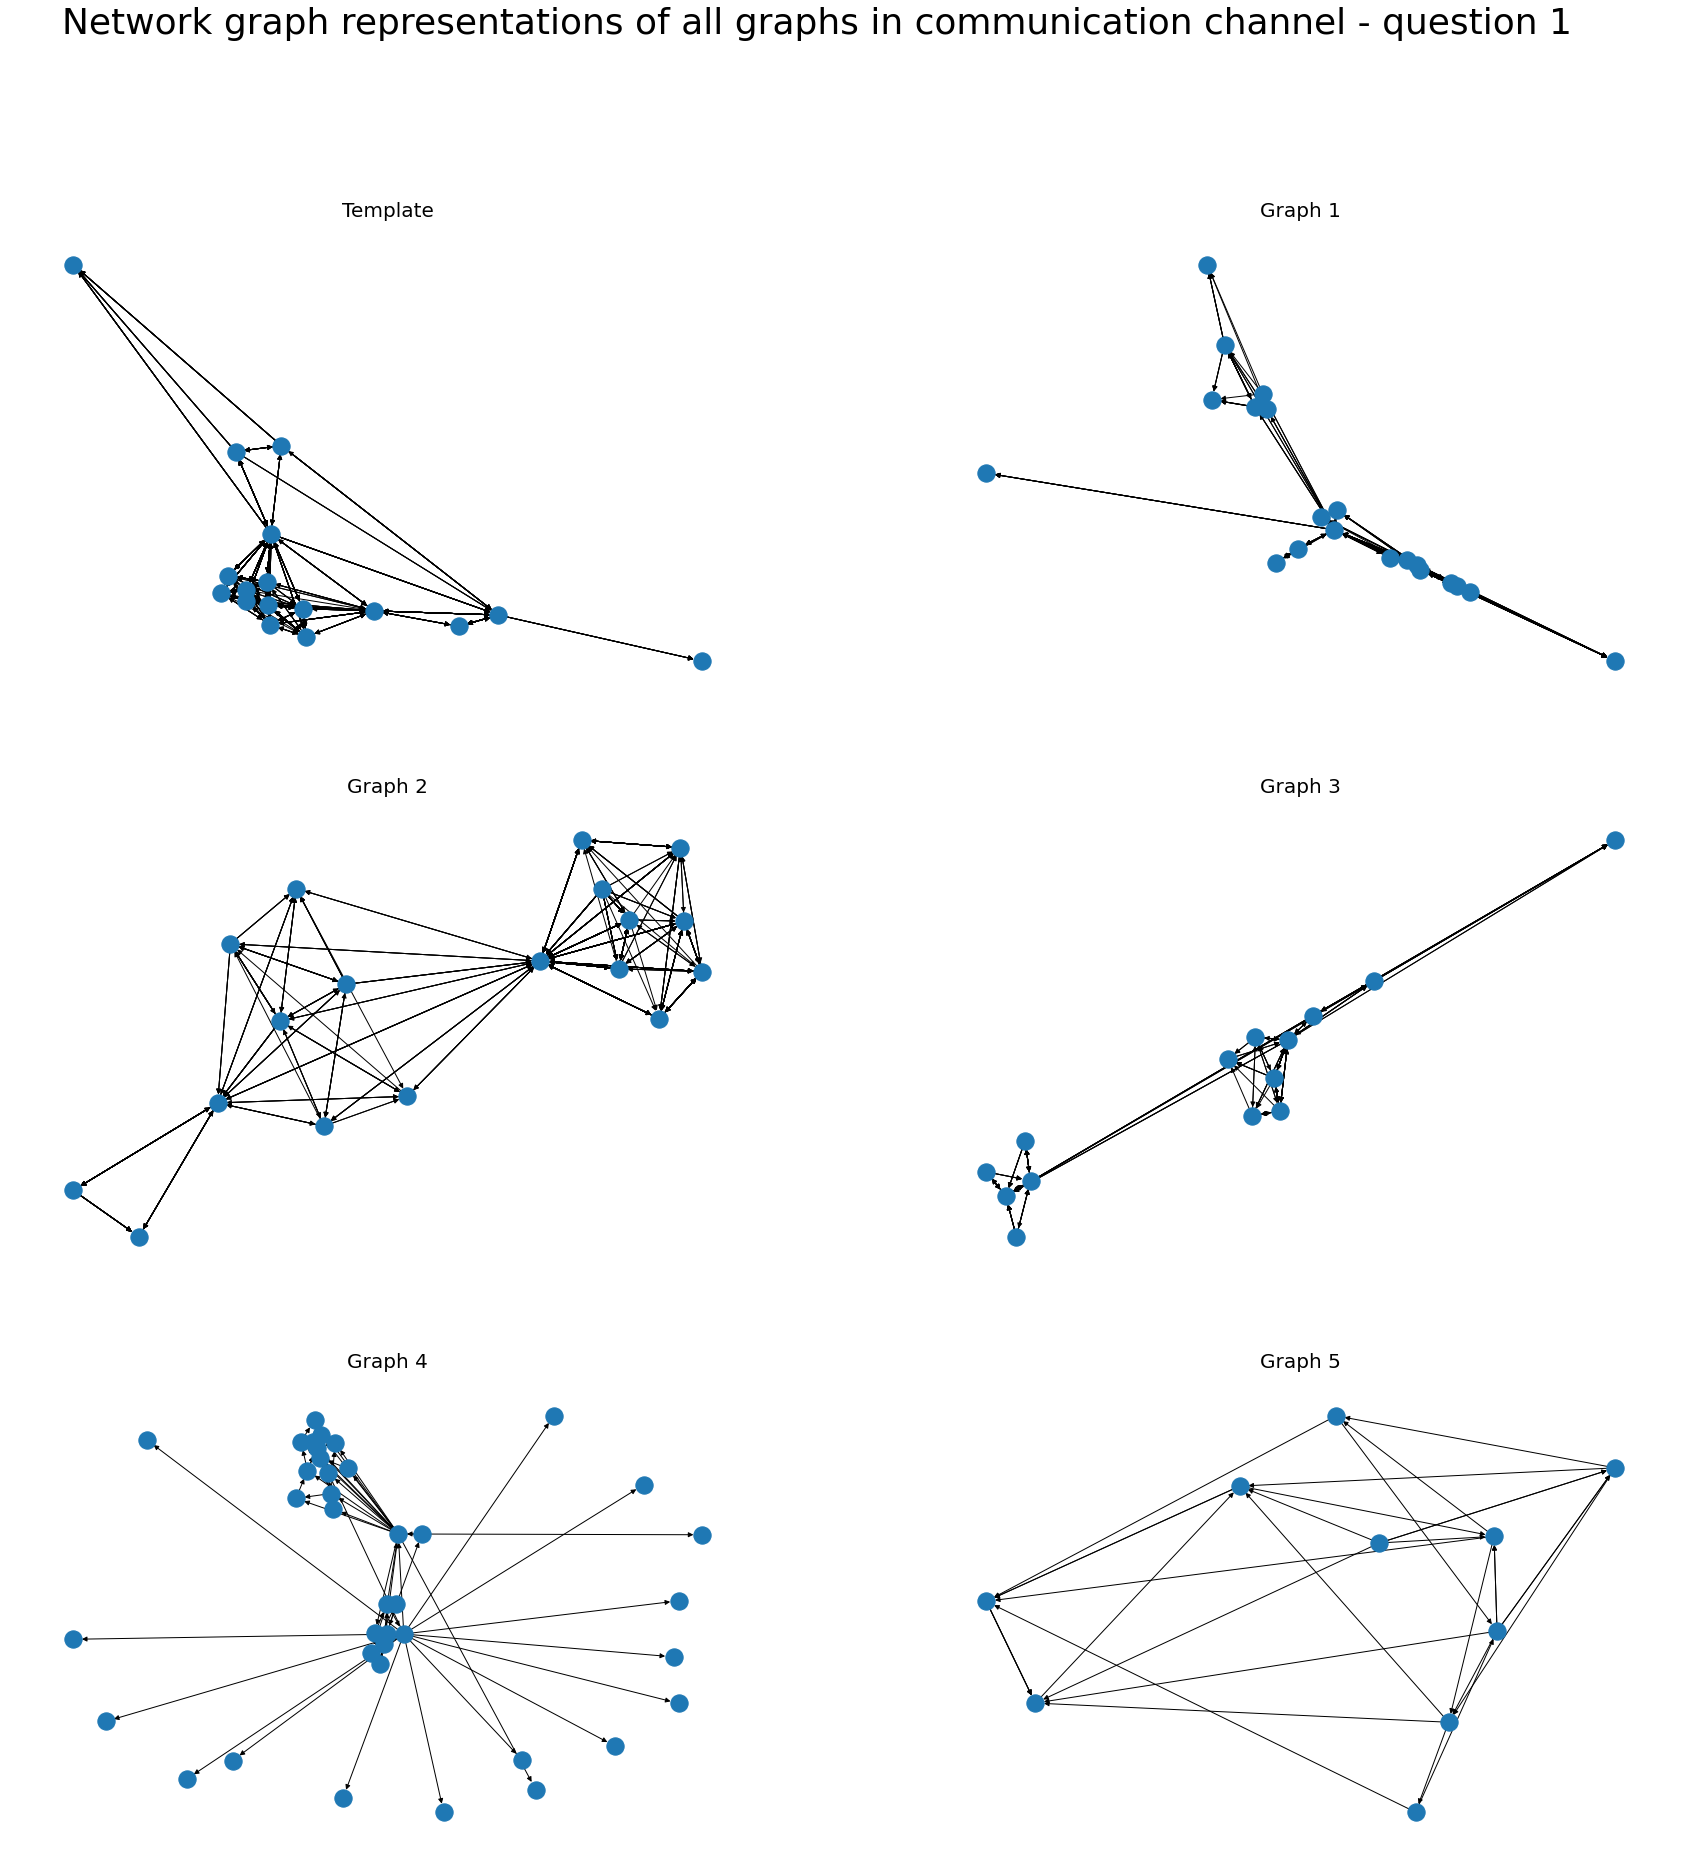

In [0]:
# Setting the graph size
f = plt.figure(figsize=(30,30))

# adding a title for the whole graph
f.suptitle('Network graph representations of all graphs in communication channel - question 1', fontsize=36)
axs = list()
# Template subplot
axs.append(f.add_subplot(321))
nx.draw(templateG, with_labels=False, font_weight='bold', ax=axs[0])
axs[0].set_title('Template', fontsize = 20)

# Graph 1
axs.append(f.add_subplot(322))
nx.draw(graph1G, with_labels=False, font_weight='bold', ax=axs[1])
axs[1].set_title('Graph 1', fontsize = 20)

# Graph 2
axs.append(f.add_subplot(323))
nx.draw(graph2G, with_labels=False, font_weight='bold', ax=axs[2])
axs[2].set_title('Graph 2', fontsize = 20)

# Graph 3
axs.append(f.add_subplot(324))
nx.draw(graph3G, with_labels=False, font_weight='bold', ax=axs[3])
axs[3].set_title('Graph 3', fontsize = 20)

# Graph 4
axs.append(f.add_subplot(325))
nx.draw(graph4G, with_labels=False, font_weight='bold', ax=axs[4])
axs[4].set_title('Graph 4', fontsize = 20)

# Graph 5
axs.append(f.add_subplot(326))
nx.draw(graph5G, with_labels=False, font_weight='bold', ax=axs[5])
axs[5].set_title('Graph 5', fontsize = 20)


plt.show()

In [0]:
graph1AdjMat = nx.adj_matrix(graph1G)

In [0]:
print(graph1AdjMat.todense())

[[0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [0]:
import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(10, 10)) # in inches
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    '''
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)'''

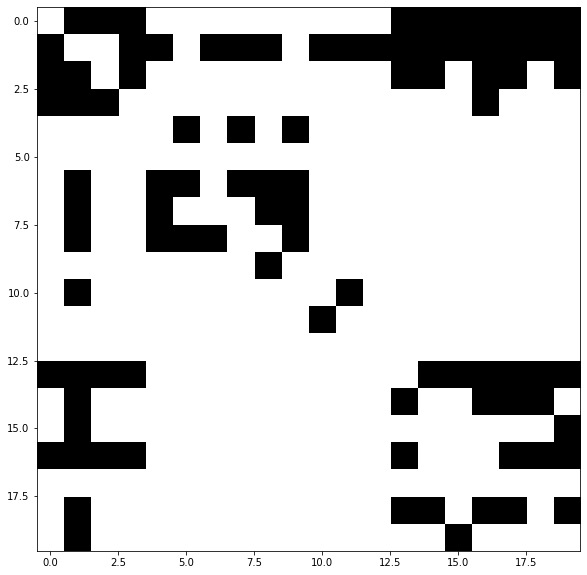

In [0]:
#from scipy import io

#A = io.mmread("Caltech.mtx")
#G = nx.from_scipy_sparse_matrix(A)
draw_adjacency_matrix(graph1G)
#draw_adjacency_matrix(graph1G2)

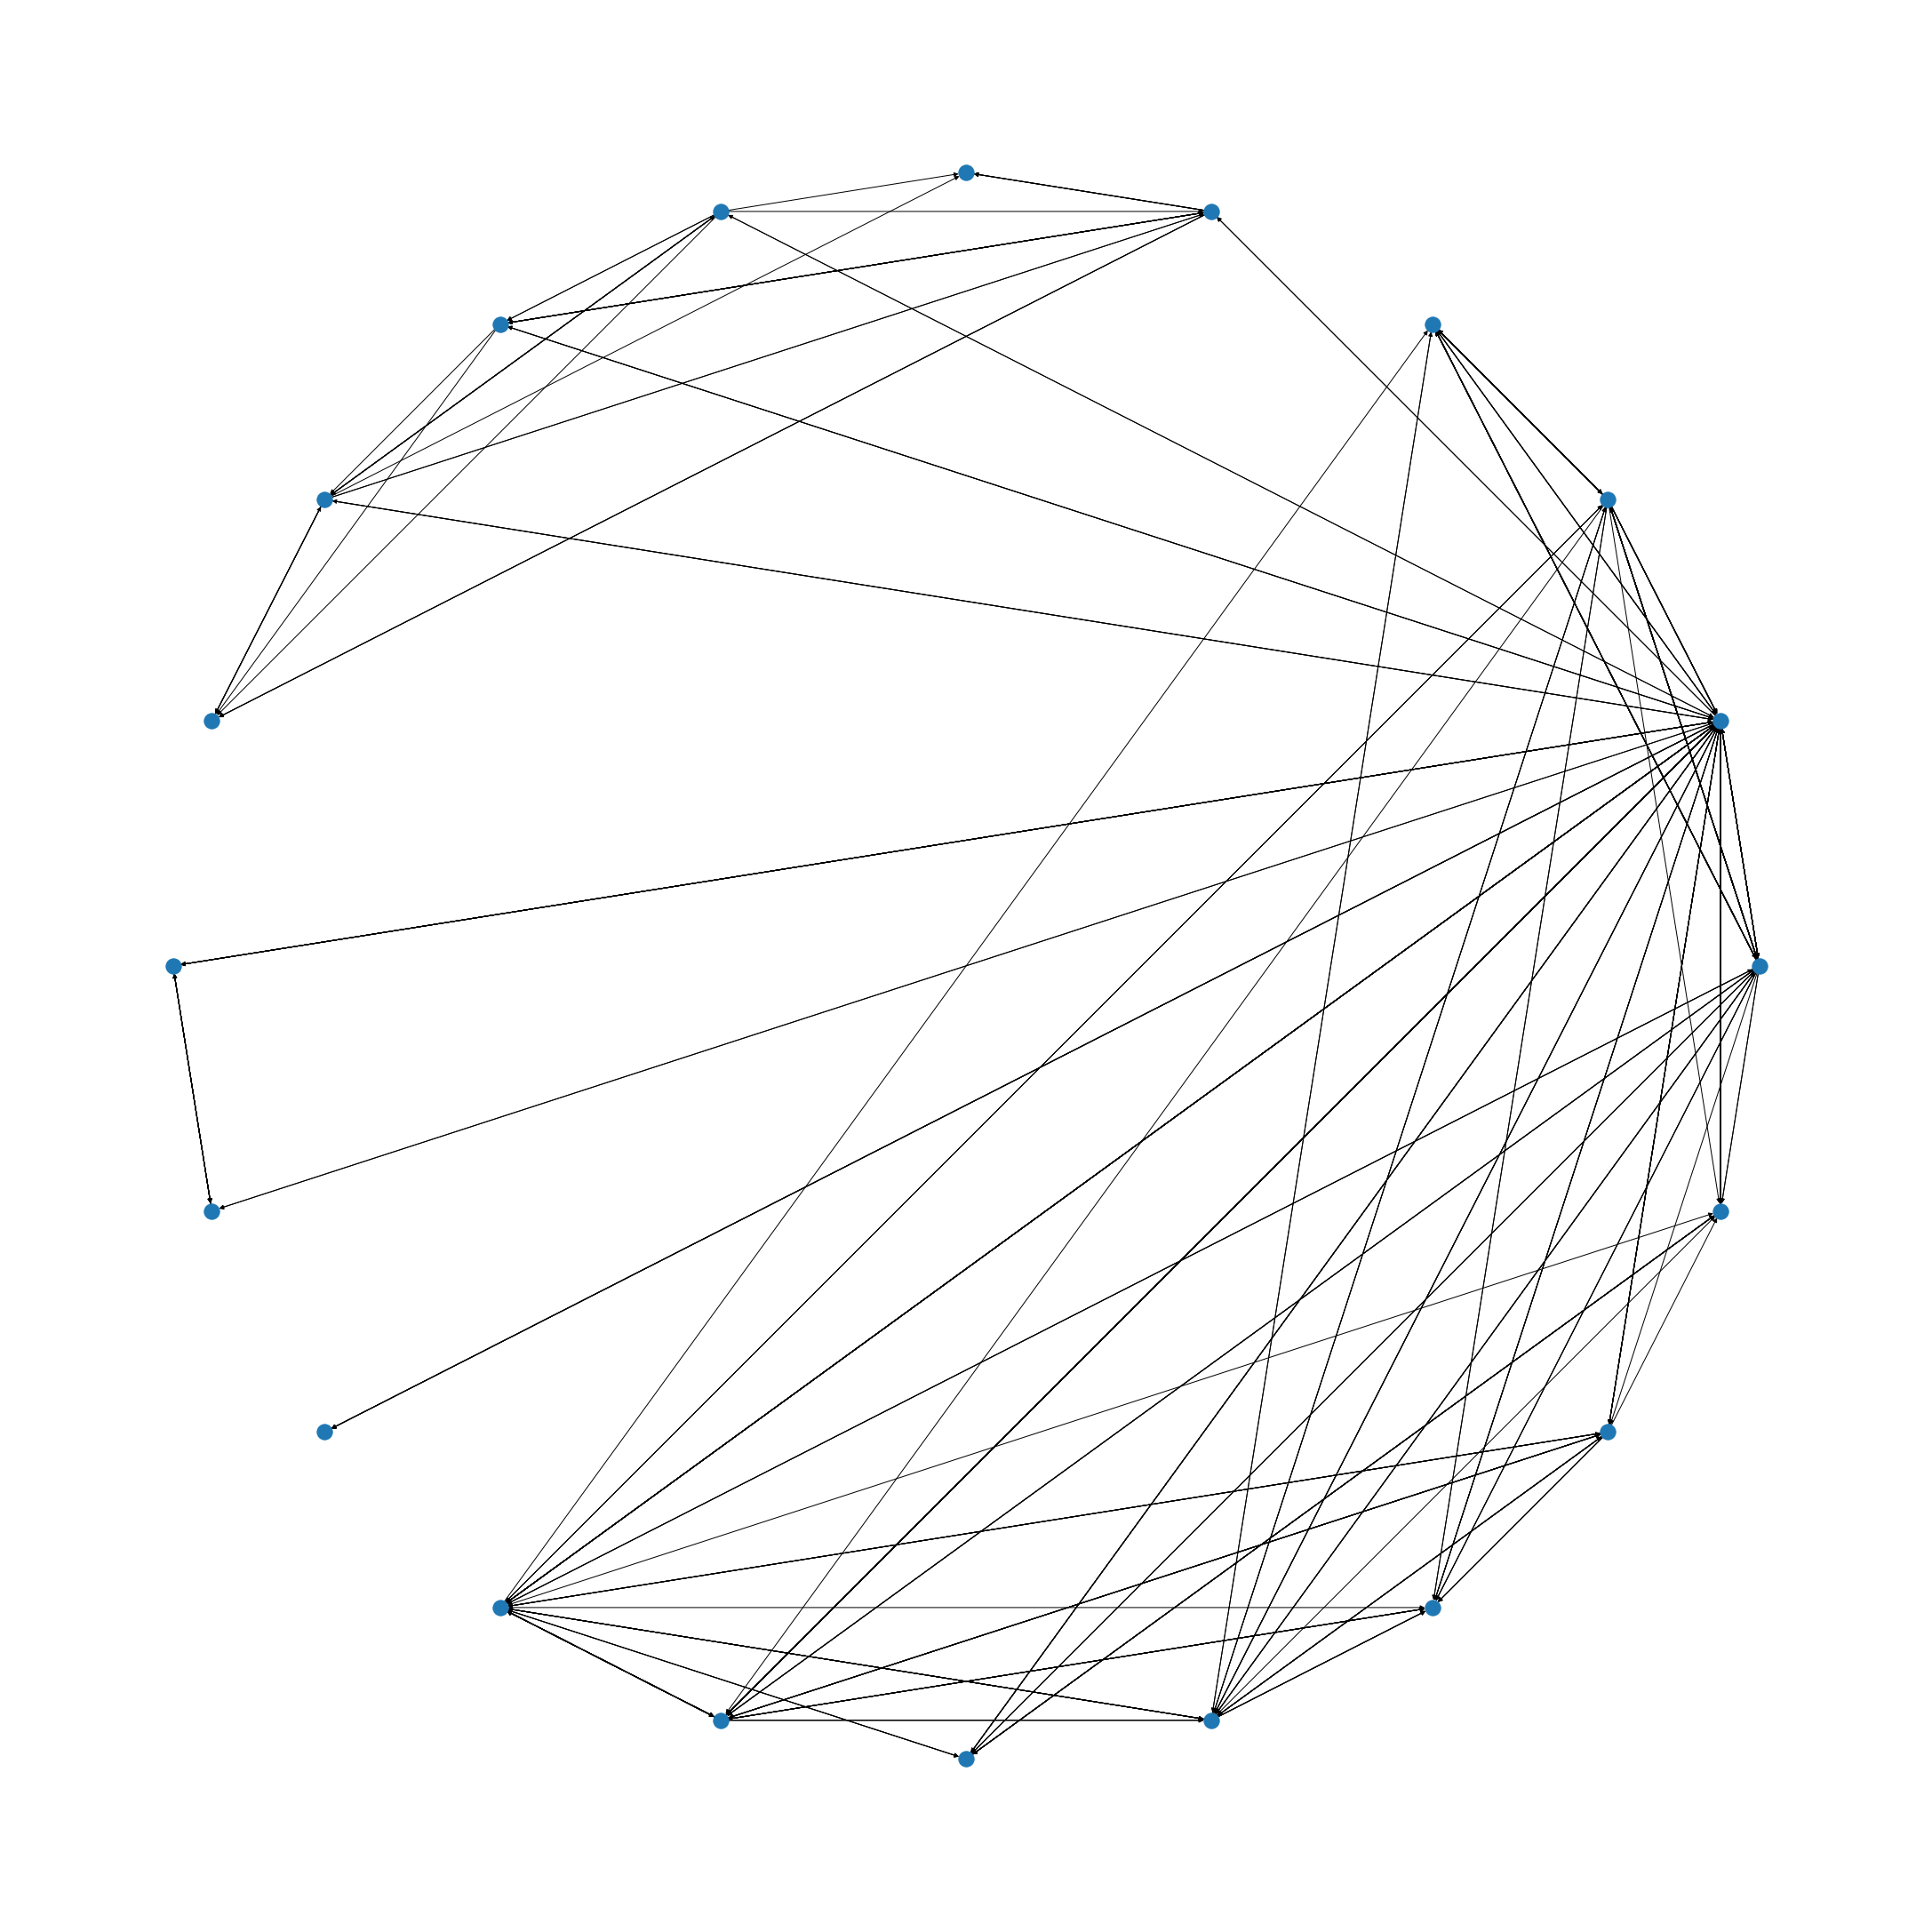

In [0]:

graph1NodesTuple2 = [tuple([x, y, z]) for x, y, z in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"],
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Time"])]
graph1G2 = nx.MultiDiGraph()

graph1G2.add_weighted_edges_from(graph1NodesTuple2, weight="Time")

nx.to_edgelist(graph1G2)


#adjacency_matrix_g1 = nx.to_numpy_matrix(graph1G2, dtype=np.bool, nodelist=None)
#figadj1 = px.density_heatmap(adjacency_matrix_g1)
#%matplotlib inline
#figadj1.show()
#figadj1.write_html("drive/My Drive/images/adjacencyheatmap1.html")
#print(adjacency_matrix_g1)
#figadj1 = plt.figure(figsize=(10, 10))
#plt.imshow(adjacency_matrix_g1, cmap="Greys", interpolation="none")
#plt.show()
figadj1 = plt.figure(figsize=(30, 30))
nx.draw_circular(graph1G2, with_labels=False, font_weight='bold')
plt.show()

In [0]:
#adjacency_matrix_g1

matrix([[False,  True,  True,  True, False, False, False, False, False,
         False, False, False, False,  True,  True,  True,  True,  True,
          True,  True],
        [ True, False, False,  True,  True, False,  True,  True,  True,
         False,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True, False,  True, False, False, False, False, False,
         False, False, False, False,  True,  True, False,  True,  True,
         False,  True],
        [ True,  True,  True, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True, False,
         False, False],
        [False, False, False, False, False,  True, False,  True, False,
          True, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, 

In [0]:
import numpy as np
from collections import defaultdict

def assignmentArray_to_lists(assignment_array):
    by_attribute_value = defaultdict(list)
    for node_index, attribute_value in enumerate(assignment_array):
        by_attribute_value[attribute_value].append(node_index)
    return by_attribute_value.values()

# Load in array which maps node index to dorm number
# Convert this to a list of lists indicating dorm membership
dorm_assignment = np.genfromtxt("caltech_dorms_blanksInferred.txt", dtype="u4")
dorm_lists = assignmentArray_to_lists(dorm_assignment)

# Create a list of all nodes sorted by dorm, and plot
# adjacency matrix with this ordering
nodes_dorm_ordered = [node for dorm in dorm_lists for node in dorm]
draw_adjacency_matrix(G, nodes_dorm_ordered, [dorm_lists],["blue"])

In [0]:
# px.density_mapbox(graph1AdjMat)
graph1AdjMat

<20x20 sparse matrix of type '<class 'numpy.longlong'>'
	with 126 stored elements in Compressed Sparse Row format>

In [0]:
def hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5 ):
  def h_recur(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None, parsed = [] ):
    if(root not in parsed):
      parsed.append(root)
    if pos == None:
      pos = {root:(xcenter,vert_loc)}
    else:
      pos[root] = (xcenter, vert_loc)
      neighbors = G.neighbors(root)
    if parent != None:
      neighbors.remove(parent)
      if len(neighbors)!=0:
        dx = width/len(neighbors)
        nextx = xcenter - width/2 - dx/2
    for neighbor in neighbors:
      nextx += dx
      pos = h_recur(G,neighbor, width = dx, vert_gap =
      vert_gap, vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos,
      parent = root, parsed = parsed)
    return pos
  return h_recur(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5)

SyntaxError: ignored

In [0]:
pos = hierarchy_pos(templateG,-99)

NameError: ignored

#### test ordering dataframes based on time

In [0]:
dfGraph5test = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')

In [0]:
print(dfGraph5test[["Source", "Time"]])
dfGraph5test.sort_values(by='Time', ascending=False, na_position='first')
print(dfGraph5test["Time"])

     Source      Time
0    619322     96346
1    594308    105656
2    524153    307922
3    524153    449990
4    619322    634562
..      ...       ...
390  573137  31536000
391  573137  31536000
392  573137  31536000
393  573137  31536000
394  552988  31536000

[395 rows x 2 columns]
0         96346
1        105656
2        307922
3        449990
4        634562
         ...   
390    31536000
391    31536000
392    31536000
393    31536000
394    31536000
Name: Time, Length: 395, dtype: int64


In [0]:
G = graph1G
#graph1G = nx.Graph()
#nx.G
#G = nx.random_geometric_graph(200, 0.125)
pos = nx.nx_pydot.graphviz_layout(G)
edge_x = []
edge_y = []
for edge in G.edges():
    
    # x0, y0 = G.nodes[edge[0]]['pos']
    # x1, y1 = G.nodes[edge[1]]['pos']
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blues',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

NameError: ignored

In [0]:
#G = graph1G
#graph1G = nx.Graph()
#nx.G
#G = nx.random_geometric_graph(200, 0.125)

graph1G2 = nx.MultiDiGraph()

graph1G2.add_weighted_edges_from(graph1NodesTuple2, weight="Time")
pos = nx.spring_layout(graph1G2)
edge_x = []
edge_y = []
G = graph1G2
for edge in G.edges():
    print(G.nodes[edge[0]], end=',')
    # x0, y0 = G.nodes[edge[0]]['pos']
    # x1, y1 = G.nodes[edge[1]]['pos']

(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 492777),(599956, 492777),(599956, 492777),(599956, 492777),(599956, 570411),(599956, 570411),(599956, 570411),(599956, 570411),(599956, 493044),(599956, 493044),(599956, 493044),(599956, 640464),(599956, 640464),(599956, 596193),(599956, 623295),(599956, 623295),(599956, 550361),(599956, 550361),(599956, 550361),(635665, 56809

In [0]:
G = graph1G
pos = nx.nx_pydot.graphviz_layout(G)
print(nx.info(graph1G))
print(pos)

Name: 
Type: MultiDiGraph
Number of nodes: 20
Number of edges: 318
Average in degree:  15.9000
Average out degree:  15.9000
{599956: (200.07, 227.97), 635665: (162.99, 163.75), 490041: (140.82, 215.72), 589639: (131.21, 261.62), 533140: (182.08, 81.735), 591682: (117.09, 18.0), 568093: (129.72, 91.602), 616050: (212.05, 100.19), 632150: (153.58, 78.649), 464459: (198.84, 21.884), 512397: (75.05, 132.73), 550287: (61.056, 175.1), 559657: (260.61, 144.13), 623295: (194.58, 251.76), 492777: (155.7, 265.01), 570411: (256.58, 210.56), 550361: (174.13, 210.92), 493044: (108.06, 236.31), 596193: (129.98, 195.75), 640464: (217.82, 184.21)}


In [0]:
pos[464459]

(198.84, 21.884)

In [0]:
for edge in G.edges():
  print(edge[0], edge[1])

599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 492777
599956 492777
599956 492777
599956 492777
599956 570411
599956 570411
599956 570411
599956 570411
599956 493044
599956 493044
599956 493044
599956 640464
599956 640464
599956 596193
599956 623295
599956 623295
599956 550361
599956 550361
599956 550361
635665 568093
635665 512397
635665 512397
635665 512397
635665 512397
635665 512397
635665 550287
635665 550287
635665 559657
635665 559657
635665 559657
635665 559657
635665 559657
635665

In [0]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [0]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
#fig.show()


In [0]:
fig.write_html("drive/My Drive/images/testGraph1.html")

In [0]:
drawingTemplate = nx.draw_circular(templateG, with_labels=False, font_weight='bold', ax=axs[0])

# Question 2

In [0]:
dfSeed1 = pd.read_csv('drive/My Drive/data/Q2-Seed1.csv')
dfSeed2 = pd.read_csv('drive/My Drive/data/Q2-Seed2.csv')
dfSeed3 = pd.read_csv('drive/My Drive/data/Q2-Seed3.csv') 

In [0]:
dfSeed1

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
0,600971,4,579269,-685755382,0.166667,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dfSeed2

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
0,538771,4,473043,-623491200,0.090909,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dfSeed3

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
0,574136,2,657187,1991785,633,NaN,NaN,NaN,NaN,NaN,NaN


### Seed 1 Graph

In [0]:
a = dfSeed1[:]

In [0]:
int(dfSeed1["Source"])

600971

In [0]:
dfSeed1[a[["Source", "eType", "Target", "Time", "Weight"]] == dfSeed1[["Source", "eType", "Target", "Time", "Weight"]]]

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
0,600971,4,579269,-685755382,0.166667,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dfSeed1_Lvl1 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1["Source"])) & (dfBigGraph['Target'] == int(dfSeed1["Target"]))]  

In [6]:
dfSeed1_Lvl1

,Source,eType,Target,Time,Weight
251658,600971,4,579269,-685755382,0.166667


In [0]:
dfSeed1_Lvl2 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1["Source"])) | (dfBigGraph['Target'] == int(dfSeed1["Target"])) | 
                 (dfBigGraph['Source'] == int(dfSeed1["Target"])) | (dfBigGraph['Target'] == int(dfSeed1["Source"]))]  

In [0]:
dfSeed1_Lvl2 = dfSeed1_Lvl2[["Source", "eType", "Target", "Time", "Weight"]]

In [0]:
dfSeed1_Lvl2[dfSeed1_Lvl2["Source"] == 600971 &]

,Source,eType,Target,Time,Weight
151203,600971,4,463021,-508376182,0.250000
251560,600971,4,607498,-541121782,0.333333
251616,600971,4,530665,-656897782,0.250000
251656,470085,4,579269,-660038400,0.166667
251657,484189,4,579269,-660038400,0.166667
...,...,...,...,...,...
123747197,600971,6,499467,23587200,0.000000
123747198,600971,6,657173,15465600,5.000000
123747199,600971,6,509607,1641600,-1.000000
123747200,600971,6,616453,24019200,3.000000


In [0]:
1641600/(24*3600)

19.0

In [0]:
dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 6]

,Source,eType,Target,Time,Weight
122552070,600971,6,616453,19785600,1.0
122552071,600971,6,657173,25401600,1.0
122552072,600971,6,499467,6307200,1.0
122552073,600971,6,657173,26006400,0.0
122552074,600971,6,499467,23587200,0.0
122552075,600971,6,657173,15465600,5.0
122552076,600971,6,509607,1641600,-1.0
122552077,600971,6,616453,24019200,3.0
122552078,600971,6,625756,2505600,5.0
122850724,600971,6,616453,19785600,1.0


In [0]:

#df3 = dfBigGraph[[(dfBigGraph['Source'] == x) & (dfBigGraph['Target'] == y) | 
#                 (dfBigGraph['Source'] == y) & (dfBigGraph['Target'] == x) for x, y in zip(df2["Source"], df2["Target"])]]

In [0]:
fig = px.scatter(dfSeed1_Lvl2, x="Source", y="Target", color="eType",
                 size='eType', hover_data=['Time'])
fig.show()

In [0]:
float(dfSeed1["Weight"])* 6 

1.000002

In [0]:
Seed1_Lvl2G = nx.DiGraph()

In [0]:
Seed1_Lvl2Tuple = [tuple([x, y]) for x, y in zip(dfSeed1_Lvl2["Source"], dfSeed1_Lvl2["Target"])]

In [0]:
Seed1_Lvl2G.add_edges_from(Seed1_Lvl2Tuple)

In [0]:
fig = plt.figure(figsize=(30,30))
nx.draw_circular(Seed1_Lvl2G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [0]:
%matplotlib inline

In [0]:
degree_centralitySeed1_Lvl2 = nx.degree_centrality(Seed1_Lvl2G)

In [0]:
# degree_centralitySeed1_Lvl2 = nx.eigenvector_centrality(Seed1_Lvl2G)


In [0]:
eigenvector_Seed1_Lvl2 = nx.eigenvector_centrality(Seed1_Lvl2G)

In [0]:
eigenvector_Seed1_Lvl2[600971]

0.13782674940555453

In [0]:
len({k: v for k, v in eigenvector_Seed1_Lvl2.items() if v >= st.mean(eigenvector_Seed1_Lvl2.values())})

2124

In [0]:
print("centrality degree range for Level 2 of Seed 1: ",
      min(list(degree_centralitySeed1_Lvl2.values())), 
      max(list(degree_centralitySeed1_Lvl2.values())))

centrality degree range for Level 2 of Seed 1:  0.0002789400278940028 1.010320781032078


In [0]:
import statistics as st

In [0]:
st.mean(list(degree_centralitySeed1_Lvl2.values()))

0.000564258494797294

In [0]:
type(degree_centralitySeed1_Lvl2)

dict

In [0]:
print(len({k: v for k, v in degree_centralitySeed1_Lvl2.items() if v > min(degree_centralitySeed1_Lvl2.values())}))

44


In [0]:
dfSeed1_Lvl3 = dfBigGraph[(dfBigGraph['Source'] == 611692) | (dfBigGraph['Target'] == 611692)]  

In [0]:
dfSeed1_Lvl3

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
151206,611692,4,463021,-482659200,0.250000,NaN,NaN,NaN,NaN,NaN,NaN
151547,611692,4,556853,-263203200,0.166667,NaN,NaN,NaN,NaN,NaN,NaN
162664,611692,4,479464,-596966400,0.200000,NaN,NaN,NaN,NaN,NaN,NaN
162670,611692,4,570772,-494582400,0.166667,NaN,NaN,NaN,NaN,NaN,NaN
162673,611692,4,468934,-462960000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
120823513,611692,5,632961,31536000,813.920000,NaN,NaN,NaN,NaN,NaN,NaN
120823514,611692,5,473173,31536000,457.540000,NaN,NaN,NaN,NaN,NaN,NaN
120823515,611692,5,620120,31536000,10602.400000,NaN,NaN,NaN,NaN,NaN,NaN
120823516,611692,5,575030,31536000,1893.350000,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
Seed1_Lvl3Tuple = [tuple([x, y]) for x, y in zip(dfSeed1_Lvl3["Source"], dfSeed1_Lvl3["Target"])]

In [0]:
Seed1_Lvl2G.add_edges_from(Seed1_Lvl3Tuple)

In [0]:
Seed1_Lvl2G.number_of_nodes()

4441

In [0]:
degree_centralitySeed1_Lvl3 = nx.degree_centrality(Seed1_Lvl2G)

In [0]:
print("centrality degree range for Level 2 of Seed 1: ",
      min(list(degree_centralitySeed1_Lvl3.values())), 
      max(list(degree_centralitySeed1_Lvl3.values())),
      " \nThe mean of all values:",
      st.mean(list(degree_centralitySeed1_Lvl3.values())))

centrality degree range for Level 2 of Seed 1:  0.00022522522522522523 0.5416666666666666  
The mean of all values: 0.0004595791468117521


In [0]:
Seed1_Lvl3Dict = {k: v for k, v in degree_centralitySeed1_Lvl3.items() if v > min(degree_centralitySeed1_Lvl3.values())}

In [0]:
## testing with the second level
Seed1_Lvl2Dict = {k: v for k, v in degree_centralitySeed1_Lvl2.items() if v > min(degree_centralitySeed1_Lvl2.values())}

In [0]:
len(Seed1_Lvl2Dict)

44

In [0]:
size = 0
for k1 in Seed1_Lvl3Dict.keys():
  # print(k, end=", ")
  if(dfBigGraph["Source"] == k1):
    size += 1
  #seed1Graph = 
print(size)

In [0]:
def checkEdge(bigGraph):
  count = 0
  for pair in tqdm(itertools.product(list(Seed1_Lvl3Dict.keys()), repeat=2)):
    yield count
    count += (len(dfBigGraph[(dfBigGraph['Source'] == pair[0]) & (dfBigGraph['Target'] == pair[1])]))
    

In [0]:
import itertools
#size = 0
#count = 0
#for pair in itertools.product(list(Seed1_Lvl3Dict.keys()), repeat=2):
    #print(*pair)
count = sum(checkEdge(dfBigGraph))
print(count)

In [0]:
checkEdge(int(dfSeed1["Source"]), int(dfSeed1["Target"]), dfBigGraph, 0)

1

In [0]:
pairs = list()
for pair in tqdm(itertools.product(list(Seed1_Lvl2Dict.keys()), repeat=2)):
  pairs.append(pair)

1936it [00:00, 1107195.60it/s]


In [0]:
pairs

In [0]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed1Graph = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs)-1900)):
  dfSeed1Graph = dfSeed1Graph.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 36/36 [00:15<00:00,  2.31it/s]


In [0]:
dfSeed1Graph

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
0,600971,4,579269,-685755382,0.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,600971,0,611692,18442247,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,600971,0,573678,9879354,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,600971,1,564804,26560681,1.000000,0.0,1.0,37.5294,-41.5884,-30.84870,-12.8853
4,600971,0,626174,8391058,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5,600971,1,559941,29812379,1.000000,0.0,3.0,37.5294,-41.5884,-24.79180,-110.5110
6,600971,1,542731,2696383,1.000000,0.0,1.0,37.5294,-41.5884,-29.52990,-14.3046
7,600971,0,529765,7172329,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
8,600971,1,470784,21610929,1.000000,0.0,0.0,37.5294,-41.5884,29.58370,-41.4059
9,600971,1,554368,12358995,1.000000,0.0,4.0,37.5294,-41.5884,-1.11593,-162.1040


In [0]:
count2 = 0
for i in tqdm(range(len(pairs))):
  count2 = count2 + len(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])])

In [0]:
# number of edges in seed1 graph
print(count2)

1914


In [0]:
#dfSeed1Graph = dfBigGraph[dfBigGraph["Source"] == -1000]

In [0]:
dfSeed1Graph = dfSeed1Graph.append(dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1['Source'])) & (dfBigGraph['Target'] == int(dfSeed1['Target']))], ignore_index=True)

In [0]:
dfSeed1Graph

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
0,600971,4,579269,-685755382,0.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,600971,0,611692,18442247,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,600971,0,573678,9879354,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,600971,1,564804,26560681,1.000000,0.0,1.0,37.5294,-41.5884,-30.8487,-12.8853
4,600971,0,626174,8391058,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
493,583737,1,605385,17919274,1.000000,0.0,2.0,24.8021,-40.1524,-19.7156,89.9960
494,583737,1,605385,17783110,1.000000,0.0,2.0,24.8021,-40.1524,-19.7156,89.9960
495,583737,0,506539,853550,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
496,583737,1,506539,13055672,1.000000,0.0,2.0,24.8021,-40.1524,-21.5812,88.2038


In [0]:
pairs[50][1]
print(len(pairs))

8281


In [0]:

count = checkEdge(*pair, dfBigGraph, count)

In [0]:
count

8579427

In [0]:
def firstn(n):
  num = 0
  while num < n:
    yield num
    num += 1

sum_of_first_n = sum(firstn(1000000))
print(sum_of_first_n)

499999500000


In [0]:
Seed1G = nx.DiGraph()

In [0]:
Seed1Tuple = [tuple([x, y]) for x, y in zip(dfSeed1Graph["Source"], dfSeed1Graph["Target"])]

In [0]:
Seed1G.add_edges_from(Seed1Tuple)

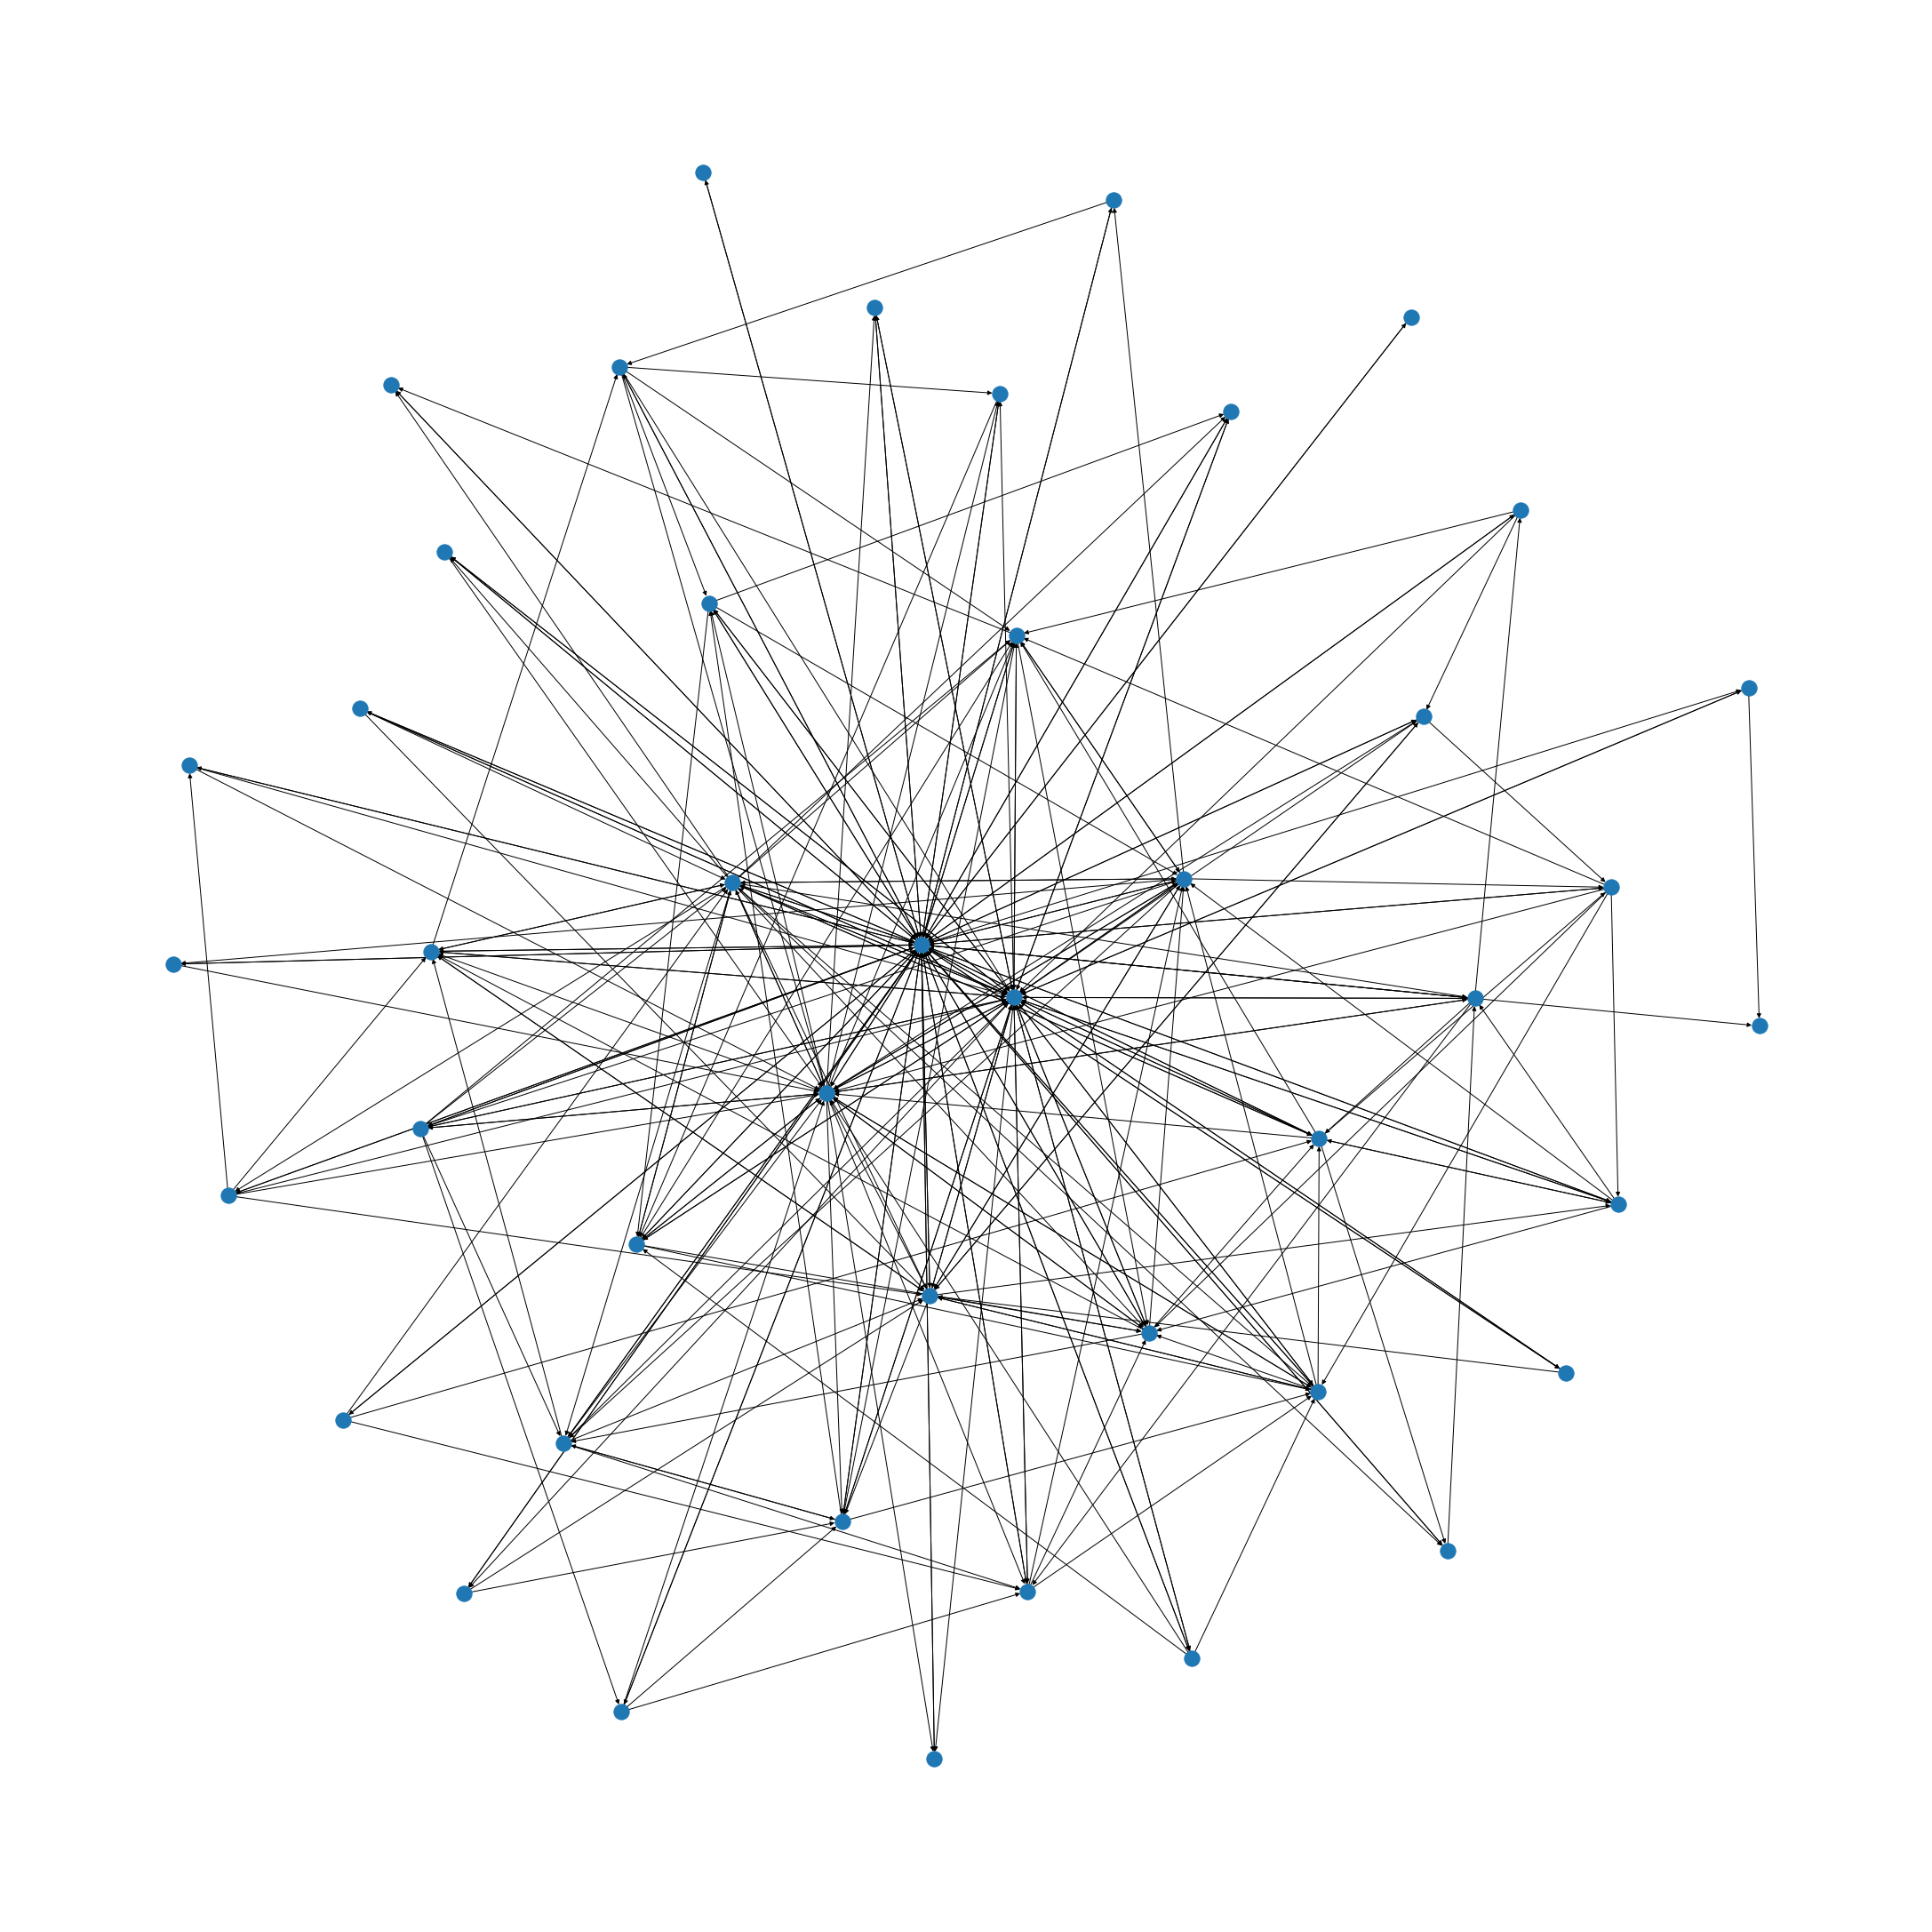

In [0]:
fig = plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(Seed1G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [0]:
dfSeed1Graph.to_csv("drive/My Drive/data/Seed1-Graph1.csv")

### Seed 2 Graph

In [0]:
dfSeed2_Lvl1 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed2["Source"])) & (dfBigGraph['Target'] == int(dfSeed2["Target"]))]  

In [0]:
dfSeed2_Lvl1

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
4998,538771,4,473043,-623491200,0.090909,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dfSeed2_Lvl2 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed2["Source"])) | (dfBigGraph['Target'] == int(dfSeed2["Target"])) | 
                 (dfBigGraph['Source'] == int(dfSeed2["Target"])) | (dfBigGraph['Target'] == int(dfSeed2["Source"]))]  

In [0]:
len(dfBigGraph[(dfBigGraph['Target'] == int(dfSeed2["Source"]))])

0

In [0]:
dfSeed2_Lvl2 = dfSeed2_Lvl2[["Source", "eType", "Target", "Time", "Weight"]]

In [0]:
dfSeed2_Lvl2[dfSeed2_Lvl2["eType"] != 4]

,Source,eType,Target,Time,Weight


In [0]:
print(dfSeed2_Lvl2["Source"].drop_duplicates())

3607    538771
4996    539232
4997    566476
4999    491573
5000    585791
5001    565073
5002    591742
5003    544629
5004    652020
5005    652440
5006    546487
Name: Source, dtype: int64


In [0]:
dfSeed2_Lvl3 = dfBigGraph[dfBigGraph["Source"] == -1000]
for nodeS in tqdm(list(dfSeed2_Lvl2["Source"].drop_duplicates())):
  #print(nodeS)
  dfSeed2_Lvl3 = dfSeed2_Lvl3.append(dfBigGraph[(dfBigGraph['Source'] == int(nodeS)) | (dfBigGraph['Target'] == int(nodeS))])  

100%|██████████| 11/11 [00:04<00:00,  2.48it/s]


In [0]:
dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 4]

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
3607,538771,4,462146,-323424000,0.062500,NaN,NaN,NaN,NaN,NaN,NaN
3632,538771,4,652563,-591868800,0.090909,NaN,NaN,NaN,NaN,NaN,NaN
3674,538771,4,653816,-242121600,0.062500,NaN,NaN,NaN,NaN,NaN,NaN
3682,538771,4,521370,-400752000,0.055556,NaN,NaN,NaN,NaN,NaN,NaN
3697,538771,4,477902,-258710400,0.100000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5023,546487,4,565737,-542707200,0.100000,NaN,NaN,NaN,NaN,NaN,NaN
5179,546487,4,633234,-641808000,0.166667,NaN,NaN,NaN,NaN,NaN,NaN
36101,546487,4,472289,-670665600,0.142857,NaN,NaN,NaN,NaN,NaN,NaN
36105,546487,4,642101,-641808000,0.166667,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dfSeed2_Lvl3

,Source,eType,Target,Time,Weight
3607,538771,4,462146,-323424000,0.062500
3632,538771,4,652563,-591868800,0.090909
3674,538771,4,653816,-242121600,0.062500
3682,538771,4,521370,-400752000,0.055556
3697,538771,4,477902,-258710400,0.100000
...,...,...,...,...,...
5023,546487,4,565737,-542707200,0.100000
5179,546487,4,633234,-641808000,0.166667
36101,546487,4,472289,-670665600,0.142857
36105,546487,4,642101,-641808000,0.166667


In [0]:
#finding the people:
dfSeed2_Lvl3_people = list()
if len(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 0]["Source"]) > 0:
  dfSeed2_Lvl3_people = dfSeed2_Lvl3_people + list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 0]["Source"].drop_duplicates())
if len(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 0]["Target"]) > 0:
  dfSeed2_Lvl3_people = dfSeed2_Lvl3_people + list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 0]["Target"].drop_duplicates())
if len(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 1]):
  dfSeed2_Lvl3_people = dfSeed2_Lvl3_people + list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 1]["Source"].drop_duplicates())
  '''  dfSeed2_Lvl3_people.append(list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 1]["Target"].drop_duplicates())[0])
  dfSeed2_Lvl3_people.append(list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 2]["Source"].drop_duplicates())[0])
  dfSeed2_Lvl3_people.append(list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 3]["Source"].drop_duplicates())[0])
  dfSeed2_Lvl3_people.append(list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 4]["Source"].drop_duplicates())[0])
  dfSeed2_Lvl3_people.append(list(dfSeed2_Lvl3[dfSeed2_Lvl3["eType"] == 6]["Source"].drop_duplicates())[0])'''



In [0]:
dfSeed2_Lvl3_people = sorted(list(dict.fromkeys(dfSeed2_Lvl3_people)))

In [0]:
sum = 0
for i in tqdm(range(100)):
  sum += len(dfBigGraph[(dfBigGraph["Source"] == dfSeed2_Lvl3_people[i]) | (dfBigGraph["Target"] == dfSeed2_Lvl3_people[i])])
print(sum)

100%|██████████| 100/100 [00:41<00:00,  2.39it/s]

490895


In [0]:
sorted(list(dict.fromkeys([1, 2] + [2, 4, 5, 3])))

[1, 2, 3, 4, 5]

In [0]:
print(dfSeed2_Lvl2["Target"].drop_duplicates())

In [0]:
Seed2_Lvl3G = nx.DiGraph()
#nx.MultiDiGraph() 
#DiGraph()

In [0]:
Seed2_Lvl3Tuple = [tuple([x, y]) for x, y in zip(dfSeed2_Lvl3["Source"], dfSeed2_Lvl3["Target"])]

In [0]:
Seed2_Lvl3G.add_edges_from(Seed2_Lvl3Tuple)
print()

In [0]:
dfSeed2_Lvl3["eType"] = dfSeed2_Lvl3["eType"].astype(str)
fig = px.scatter(dfSeed2_Lvl3, x="Source", y="Target", color="eType",
                  hover_data=['Time'])
fig.show()

In [0]:
fig = plt.figure(figsize=(30,30))
nx.draw_circular(Seed2_Lvl3G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [0]:
degree_centralitySeed2_Lvl3 = nx.degree_centrality(Seed2_Lvl3G)


In [0]:
#degree_centralitySeed2_Lvl3[652020]
{k: v for k, v in degree_centralitySeed2_Lvl3.items() if v == max(degree_centralitySeed2_Lvl3.values())}

{652020: 1.0071845532105972}

In [0]:
betweenness_centralitySeed2_Lvl3 = nx.betweenness_centrality(Seed2_Lvl3G)

In [0]:
print("centrality degree range for Level 2 of Seed 2: ",
      min(list(degree_centralitySeed2_Lvl3.values())), 
      max(list(degree_centralitySeed2_Lvl3.values())))
print(len([x for x in degree_centralitySeed2_Lvl3.values() if x != min(list(degree_centralitySeed2_Lvl3.values()))]))

centrality degree range for Level 2 of Seed 2:  0.000449034575662326 1.0071845532105972
260


In [0]:
print("centrality degree range for Level 2 of Seed 2: ",
      min(list(betweenness_centralitySeed2_Lvl3.values())), 
      max(list(betweenness_centralitySeed2_Lvl3.values())))
print(len([x for x in betweenness_centralitySeed2_Lvl3.values() if x != min(list(betweenness_centralitySeed2_Lvl3.values()))]))

centrality degree range for Level 2 of Seed 2:  0.0 0.25371139381865376
1


In [0]:
st.mean(list(degree_centralitySeed2_Lvl3.values()))

0.001059705475239008

In [0]:
type(degree_centralitySeed2_Lvl2)

dict

In [0]:
#degree_centralitySeed2_Lvl2
print(dfSeed2["Source"], dfSeed2["Target"])

0    538771
Name: Source, dtype: int64 0    473043
Name: Target, dtype: int64


In [0]:
print("more than minimum: ", 
      len({k: v for k, v in degree_centralitySeed2_Lvl3.items() if v > min(degree_centralitySeed2_Lvl3.values())}))
print("more than mean: ",
      len({k: v for k, v in degree_centralitySeed2_Lvl3.items() if v > st.mean(list(degree_centralitySeed2_Lvl3.values()))}))

more than minimum:  260
more than mean:  96


In [0]:
#Seed2_Lvl3Dict = {k: v for k, v in degree_centralitySeed2_Lvl3.items() if v > st.mean(list(degree_centralitySeed2_Lvl3.values()))}
Seed2_Lvl3Dict = {k: v for k, v in degree_centralitySeed2_Lvl3.items() if v > min(list(degree_centralitySeed2_Lvl3.values()))}

In [0]:
len(Seed2_Lvl3Dict)

260

In [0]:
pairs = list()
for pair in tqdm(itertools.product(list(Seed2_Lvl3Dict.keys()), repeat=2)):
  pairs.append(pair)

67600it [00:00, 1802006.75it/s]


In [0]:
count2 = 0
for i in tqdm(range(len(pairs))):
  count2 = count2 + len(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])])

100%|██████████| 8281/8281 [52:12<00:00,  2.64it/s]


In [0]:
# number of edges in seed1 graph
print(count2)

1914


In [0]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed1Graph = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed1Graph = dfSeed1Graph.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 9216/9216 [1:08:10<00:00,  2.25it/s]


In [0]:
dfSeed2Graph = dfSeed1Graph

In [0]:
dfSeed2Graph[dfSeed2Graph["eType"] != 4]

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude


In [0]:
pairs[50][1]
print(len(pairs))

8281


In [0]:
260**2

67600

In [0]:
(55 * (67600/8281))/60

7.482993197278912

In [0]:

count = checkEdge(*pair, dfBigGraph, count)

In [0]:
count

8579427

In [0]:
def firstn(n):
  num = 0
  while num < n:
    yield num
    num += 1

sum_of_first_n = sum(firstn(1000000))
print(sum_of_first_n)

499999500000


In [0]:
Seed1G = nx.DiGraph()

In [0]:
Seed1Tuple = [tuple([x, y]) for x, y in zip(dfSeed1Graph["Source"], dfSeed1Graph["Target"])]

In [0]:
Seed1G.add_edges_from(Seed1Tuple)

In [0]:
fig = plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(Seed1G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [0]:
dfSeed2Graph.to_csv("drive/My Drive/data/Seed2-Graph1.csv")

### Seed 3 Graph

In [0]:
a= dfSeed3[:]

In [0]:
dfSeed3_Lvl1 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed3["Source"])) & (dfBigGraph['Target'] == int(dfSeed3["Target"]))]  

In [0]:
dfSeed3_Lvl1

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
7068974,574136,2,657187,1991785,633.0,NaN,NaN,NaN,NaN,NaN,NaN
50155815,574136,2,657187,6742286,546.0,NaN,NaN,NaN,NaN,NaN,NaN
52622375,574136,2,657187,22839875,82.0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dfSeed3_seller = dfBigGraph[(dfBigGraph['Time'] == int(dfSeed3["Time"])) & (dfBigGraph['Target'] == int(dfSeed3["Target"]))]

In [0]:
dfSeed3_seller

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
7068974,574136,2,657187,1991785,633.0,NaN,NaN,NaN,NaN,NaN,NaN
7068975,620791,3,657187,1991785,633.0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dfSeed3_Lvl2 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed3["Source"])) | (dfBigGraph['Target'] == int(dfSeed3["Target"])) | 
                 (dfBigGraph['Source'] == int(dfSeed3["Target"])) | (dfBigGraph['Target'] == int(dfSeed3["Source"]))]  

In [0]:
dfSeed3_Lvl2 = dfSeed3_Lvl2[["Source", "eType", "Target", "Time", "Weight"]]

In [0]:
dfSeed3_Lvl2[dfSeed3_Lvl2["eType"] != 13]

,Source,eType,Target,Time,Weight
341874,557387,0,574136,29934736,1.0
341875,574136,0,539941,29934736,1.0
378499,635193,1,574136,9210880,1.0
378501,574136,3,617468,9210880,2.0
457164,621729,1,574136,17573550,1.0
...,...,...,...,...,...
123368609,574136,6,499467,12096000,4.0
123667417,574136,6,657173,2160000,2.0
123667418,574136,6,561157,13305600,1.0
123667419,574136,6,499467,19008000,1.0


In [0]:
#df3 = dfBigGraph[[(dfBigGraph['Source'] == x) & (dfBigGraph['Target'] == y) | 
#                 (dfBigGraph['Source'] == y) & (dfBigGraph['Target'] == x) for x, y in zip(df2["Source"], df2["Target"])]]

In [0]:
dfSeed3_Lvl2["eType"] = dfSeed3_Lvl2["eType"].astype(str)
fig = px.scatter(dfSeed3_Lvl2, x="Source", y="Target", color="eType",
                 size='Time', hover_data=['Time'])
fig.show()

In [0]:
Seed3_Lvl2G = nx.DiGraph()

In [0]:
Seed3_Lvl2Tuple = [tuple([x, y]) for x, y in zip(dfSeed3_Lvl2["Source"], dfSeed3_Lvl2["Target"])]

In [0]:
Seed3_Lvl2G.add_edges_from(Seed3_Lvl2Tuple)

In [0]:
fig = plt.figure(figsize=(30,30))
nx.draw_circular(Seed1_Lvl2G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [0]:
%matplotlib inline

In [0]:
degree_centralitySeed3_Lvl2 = nx.degree_centrality(Seed3_Lvl2G)

In [0]:
print("centrality degree range for Level 2 of Seed 1: ",
      min(list(degree_centralitySeed3_Lvl2.values())), 
      max(list(degree_centralitySeed3_Lvl2.values())))

centrality degree range for Level 2 of Seed 1:  0.0003081664098613251 1.0117103235747305


In [0]:
st.mean(list(degree_centralitySeed1_Lvl2.values()))

0.000564258494797294

In [0]:
type(degree_centralitySeed1_Lvl2)

dict

In [0]:
print(len({k: v for k, v in degree_centralitySeed3_Lvl2.items() if v > min(degree_centralitySeed3_Lvl2.values())}))

53


In [0]:
Seed3_Lvl2Dict = {k: v for k, v in degree_centralitySeed3_Lvl2.items() if v > min(degree_centralitySeed3_Lvl2.values())}

In [0]:
dfSeed1_Lvl3 = dfBigGraph[(dfBigGraph['Source'] == 611692) | (dfBigGraph['Target'] == 611692)]  

In [0]:
dfSeed1_Lvl3

In [0]:
Seed1_Lvl3Tuple = [tuple([x, y]) for x, y in zip(dfSeed1_Lvl3["Source"], dfSeed1_Lvl3["Target"])]

In [0]:
Seed1_Lvl2G.add_edges_from(Seed1_Lvl3Tuple)

In [0]:
Seed1_Lvl2G.number_of_nodes()

4441

In [0]:
degree_centralitySeed1_Lvl3 = nx.degree_centrality(Seed1_Lvl2G)

In [0]:
print("centrality degree range for Level 2 of Seed 1: ",
      min(list(degree_centralitySeed1_Lvl3.values())), 
      max(list(degree_centralitySeed1_Lvl3.values())),
      " \nThe mean of all values:",
      st.mean(list(degree_centralitySeed1_Lvl3.values())))

centrality degree range for Level 2 of Seed 1:  0.00022522522522522523 0.5416666666666666  
The mean of all values: 0.0004595791468117521


In [0]:
Seed3_Lvl3Dict = {k: v for k, v in degree_centralitySeed3_Lvl3.items() if v > min(degree_centralitySeed3_Lvl3.values())}

In [0]:
## testing with the second level
Seed1_Lvl3Dict = {k: v for k, v in degree_centralitySeed1_Lvl2.items() if v > min(degree_centralitySeed1_Lvl2.values())}

In [0]:
len(Seed3_Lvl2Dict)

53

In [0]:
size = 0
for k1 in Seed1_Lvl3Dict.keys():
  # print(k, end=", ")
  if(dfBigGraph["Source"] == k1):
    size += 1
  #seed1Graph = 
print(size)

In [0]:
def checkEdge(bigGraph):
  count = 0
  for pair in tqdm(itertools.product(list(Seed1_Lvl3Dict.keys()), repeat=2)):
    yield count
    count += (len(dfBigGraph[(dfBigGraph['Source'] == pair[0]) & (dfBigGraph['Target'] == pair[1])]))
    

In [0]:
from tqdm import trange
from tqdm import tqdm

In [0]:
import itertools
#size = 0
#count = 0
#for pair in itertools.product(list(Seed1_Lvl3Dict.keys()), repeat=2):
    #print(*pair)
count = sum(checkEdge(dfBigGraph))
print(count)

In [0]:
checkEdge(int(dfSeed1["Source"]), int(dfSeed1["Target"]), dfBigGraph, 0)

1

In [0]:
pairs = list()
for pair in tqdm(itertools.product(list(Seed3_Lvl2Dict.keys()), repeat=2)):
  pairs.append(pair)

2809it [00:00, 706978.69it/s]


In [0]:
count2 = 0
for i in tqdm(range(len(pairs))):
  count2 = count2 + len(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])])

In [0]:
# number of edges in seed1 graph
print(count2)

1914


In [0]:
# Creating an empty dfSeed1Graph file for our final graph based on seed1 file
dfSeed3Graph = dfBigGraph[dfBigGraph["Source"] == -1000]
# in a for loop we find and add all the edges in our graph from the big graph
for i in tqdm(range(len(pairs))):
  dfSeed3Graph = dfSeed3Graph.append(dfBigGraph[(dfBigGraph['Source'] == pairs[i][0]) & (dfBigGraph['Target'] == pairs[i][1])], ignore_index=True)

100%|██████████| 2809/2809 [18:24<00:00,  2.54it/s]


In [0]:
#dfSeed1Graph = dfBigGraph[dfBigGraph["Source"] == -1000]

In [0]:
dfSeed1Graph = dfSeed1Graph.append(dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1['Source'])) & (dfBigGraph['Target'] == int(dfSeed1['Target']))], ignore_index=True)

In [0]:
dfSeed3Graph

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
0,574136,1,546631,18318465,1.0,4.0,0.0,-1.60010,-161.631,37.20320,-32.8121
1,574136,0,578302,18215874,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,574136,0,508047,29912819,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,574136,0,513854,28004575,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,574136,1,620791,1991785,1.0,4.0,4.0,-1.60010,-161.631,0.32756,-167.8510
...,...,...,...,...,...,...,...,...,...,...,...
374,633599,1,574136,9945007,1.0,4.0,4.0,-4.39402,-170.587,-1.60010,-161.6310
375,633599,0,602415,23991164,1.0,NaN,NaN,NaN,NaN,NaN,NaN
376,633599,0,623468,3609606,1.0,NaN,NaN,NaN,NaN,NaN,NaN
377,633599,0,623468,28000099,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dfSeed3Graph_s = dfSeed3Graph
#.astype({'Source': 'object', 'Target': 'object'}).dtypes

In [0]:
dfSeed3Graph_s['Source'] = dfSeed3Graph_s['Source'].astype(str)
dfSeed3Graph_s['Target'] = dfSeed3Graph_s['Target'].astype(str)

In [0]:
fig = px.scatter(dfSeed3Graph, x="Source", y="Target", color="Time",
                 size='eType', hover_data=['Time'])
fig.show()

In [0]:
fig = px.scatter(dfSeed3Graph_s, x="Source", y="Target", color="Time",
                 size='eType', hover_data=['Time'])
fig.show()

In [0]:
pairs[50][1]
print(len(pairs))

8281


In [0]:

count = checkEdge(*pair, dfBigGraph, count)

In [0]:
count

8579427

In [0]:
def firstn(n):
  num = 0
  while num < n:
    yield num
    num += 1

sum_of_first_n = sum(firstn(1000000))
print(sum_of_first_n)

499999500000


In [0]:
Seed1G = nx.DiGraph()

In [0]:
Seed1Tuple = [tuple([x, y]) for x, y in zip(dfSeed1Graph["Source"], dfSeed1Graph["Target"])]

In [0]:
Seed1G.add_edges_from(Seed1Tuple)

In [0]:
fig = plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(Seed1G)
#pos=nx.shell_layout(ego_net)

#nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')
plt.show()

In [0]:
dfSeed3Graph.to_csv("drive/My Drive/data/Seed3-Graph1.csv")

### Seed 1 generation 2nd attempt

In [0]:
dfSeed1_Lvl1 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1["Source"])) & (dfBigGraph['Target'] == int(dfSeed1["Target"]))]  

In [7]:
dfSeed1_Lvl1

,Source,eType,Target,Time,Weight,SourceLocation
251658,600971,4,579269,-685755382,0.166667,NaN


In [0]:
dfSeed1_Lvl2 = dfBigGraph[(dfBigGraph['Source'] == int(dfSeed1["Source"])) | (dfBigGraph['Target'] == int(dfSeed1["Target"])) | 
                 (dfBigGraph['Source'] == int(dfSeed1["Target"])) | (dfBigGraph['Target'] == int(dfSeed1["Source"]))]  

#### checking the people connected by eType 4

In [27]:
dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 4]

,Source,eType,Target,Time,Weight
151203,600971,4,463021,-508376182,0.250000
251560,600971,4,607498,-541121782,0.333333
251616,600971,4,530665,-656897782,0.250000
251656,470085,4,579269,-660038400,0.166667
251657,484189,4,579269,-660038400,0.166667
251658,600971,4,579269,-685755382,0.166667
251659,540660,4,579269,-660038400,0.166667
251660,611692,4,579269,-660038400,0.166667
251661,609913,4,579269,-660038400,0.166667


In [23]:
dfBigGraph[(dfBigGraph['eType'] == 4) & ((dfBigGraph['Target'] == 463021) | 
                 (dfBigGraph['Target'] == int(607498)) | (dfBigGraph['Target'] == int(530665)))]

,Source,eType,Target,Time,Weight
151203,600971,4,463021,-508376182,0.250000
151204,561356,4,463021,-482659200,0.250000
151205,609913,4,463021,-482659200,0.250000
151206,611692,4,463021,-482659200,0.250000
251560,600971,4,607498,-541121782,0.333333
251561,611692,4,607498,-515404800,0.333333
251562,475588,4,607498,-515404800,0.333333
251616,600971,4,530665,-656897782,0.250000
251617,540660,4,530665,-631180800,0.250000
251618,611692,4,530665,-631180800,0.250000


In [0]:
dfSeed1_eT4People = list()
for target in dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 4]["Target"]:
  dfSeed1_eT4People += (list(dfBigGraph[(dfBigGraph['eType'] == 4) & (dfBigGraph['Target'] == target)]["Source"]))

In [37]:
dfSeed1_eT4People =  list(dict.fromkeys(dfSeed1_eT4People))
print(dfSeed1_eT4People)

[600971, 561356, 609913, 611692, 475588, 540660, 470085, 484189]


#### checking the people connected by eType 0 and 1

In [38]:
dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 0]

,Source,eType,Target,Time,Weight
539052,478853,0,600971,16520421,1.0
765953,531430,0,600971,27765727,1.0
885777,561931,0,600971,28399738,1.0
1049489,581835,0,600971,31439805,1.0
1049490,600971,0,596866,31439805,1.0
...,...,...,...,...,...
123596477,612711,0,600971,5124943,1.0
123596478,612711,0,600971,5571681,1.0
123596479,612711,0,600971,5466827,1.0
123596534,643411,0,600971,3294251,1.0


In [39]:
dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 1]

,Source,eType,Target,Time,Weight
470643,509373,1,600971,15163602,1.0
470644,600971,1,544636,15163602,1.0
539053,600971,1,498608,16520421,1.0
765954,600971,1,495711,27765727,1.0
811653,588245,1,600971,432045,1.0
...,...,...,...,...,...
123596601,598006,1,600971,4896827,1.0
123596602,598006,1,600971,4021148,1.0
123596763,622306,1,600971,10144718,1.0
123596764,622306,1,600971,3941269,1.0


In [30]:
dfSeed1_eT0People = list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 0]["Source"]) + list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 0]["Target"])
print(len(dfSeed1_eT0People))

3108


In [23]:
len(list(dict.fromkeys(dfSeed1_eT0People)))

1540

In [31]:
dfSeed1_eT1People = list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 1]["Source"]) + list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 1]["Target"])
print(len(dfSeed1_eT1People))

4428


In [25]:
len(list(dict.fromkeys(dfSeed1_eT1People)))

2051

In [33]:
print(len(list(dfSeed1_eT0People) + list(dfSeed1_eT1People)))

7536


In [35]:
print(len(list(dict.fromkeys(
    list(dfSeed1_eT0People) + 
    list(dfSeed1_eT1People)
))))

3551


#### checking the people connected by eType 2 and 3

In [0]:
dfSeed1_eT2People = list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 2]["Source"])

In [0]:
dfSeed1_eT3People = list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 3]["Source"])

In [53]:
print(len(dfSeed1_eT2People), len(dfSeed1_eT3People))

0 0


#### checking the people connected by eType 5

In [0]:
dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 5]

In [0]:
dfCategories = pd.read_csv('drive/My Drive/data/DemographicCategories.csv')

In [0]:
dfCategories

In [0]:
for id, category in zip(dfCategories["NodeID"], dfCategories["Category"]):
  print("Is category(", category, ") in the Sources of big graph?  ",  id in dfBigGraph["Source"]) 

In [0]:
for id, category in zip(dfCategories["NodeID"], dfCategories["Category"]):
  print("Is category(", category, ") in the targets of big graph?  ",  id in dfBigGraph["Target"]) 

NodeID
Category


In [0]:
dfSeed1_eT5People = list(dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 5]["Source"])

In [63]:
dfCategories["NodeID"][0] in dfBigGraph["Target"]

True

#### checking the people connected by eType 6

In [9]:
dfSeed1_eT6 = dfSeed1_Lvl2[dfSeed1_Lvl2["eType"] == 6].drop_duplicates()
#sorted()
print(dfSeed1_eT6)

           Source  eType  Target      Time  Weight  SourceLocation
122552070  600971      6  616453  19785600     1.0             4.0
122552071  600971      6  657173  25401600     1.0             5.0
122552072  600971      6  499467   6307200     1.0             4.0
122552073  600971      6  657173  26006400     0.0             4.0
122552074  600971      6  499467  23587200     0.0             4.0
122552075  600971      6  657173  15465600     5.0             4.0
122552076  600971      6  509607   1641600    -1.0             0.0
122552077  600971      6  616453  24019200     3.0             0.0
122552078  600971      6  625756   2505600     5.0             4.0


In [87]:
list(dfSeed1_eT6People["Weight"])[0]

1.0

In [10]:
dfBigGraph[(dfBigGraph['eType'] == 6) & 
           (dfBigGraph['Target'] == int(616453)) &
           (dfBigGraph['Time'] == int(19785600)) &  
           (dfBigGraph['Weight'] == list(dfSeed1_eT6["Weight"])[0])]

,Source,eType,Target,Time,Weight,SourceLocation
122417656,523816,6,616453,19785600,1.0,4.0
122420307,619696,6,616453,19785600,1.0,1.0
122423507,517100,6,616453,19785600,1.0,4.0
122445124,620593,6,616453,19785600,1.0,0.0
122476571,627022,6,616453,19785600,1.0,1.0
...,...,...,...,...,...,...
123797390,570988,6,616453,19785600,1.0,2.0
123821304,654304,6,616453,19785600,1.0,4.0
123865758,468539,6,616453,19785600,1.0,4.0
123875053,463212,6,616453,19785600,1.0,2.0


In [14]:
dfSeed1_eT6People = list()
for target, time, weight, sourceLoc in tqdm(zip(list(dfSeed1_eT6["Target"]), 
                                                list(dfSeed1_eT6["Time"]), 
                                                list(dfSeed1_eT6["Weight"]),
                                                list(dfSeed1_eT6["SourceLocation"]))):
  #print(target, time, weight)
  dfSeed1_eT6People += list(
      dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &  
                 (dfBigGraph['Weight'] == weight) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)]["Source"])

9it [00:11,  1.24s/it]


In [15]:
len(dfSeed1_eT6People)

305

In [16]:
len(list(dict.fromkeys(dfSeed1_eT6People)))

53

In [20]:
dfSeed1_eT6People = list()
for target, time, weight, sourceLoc in tqdm(zip(list(dfSeed1_eT6["Target"]), 
                                                list(dfSeed1_eT6["Time"]), 
                                                list(dfSeed1_eT6["Weight"]),
                                                list(dfSeed1_eT6["SourceLocation"]))):

      print(len(dfBigGraph[(dfBigGraph['eType'] == 6) & 
                 (dfBigGraph['Target'] == target) &
                 (dfBigGraph['Time'] == time) &  
                 (dfBigGraph['Weight'] == weight) &
                 (dfBigGraph["SourceLocation"] == sourceLoc)].drop_duplicates()))

1it [00:01,  1.37s/it]

7


2it [00:03,  1.54s/it]

3


3it [00:04,  1.50s/it]

6


4it [00:05,  1.43s/it]

9


5it [00:07,  1.39s/it]

8


6it [00:09,  1.53s/it]

4


7it [00:10,  1.54s/it]

16


8it [00:11,  1.45s/it]

2


9it [00:13,  1.47s/it]

6


### Seed 2 generation 2

### Seed 3 generation 2

# Dunamic time warping

In [0]:
pip install dtw-python


     |████████████████████████████████| 256kB 2.8MB/s 
  Created wheel for dtw-python: filename=dtw_python-1.0.5-cp36-cp36m-linux_x86_64.whl size=499295 sha256=6c9450ba9c048aaa6156933b94184f6b0854a8b4f37fbc7bf693679f63f3d46d
  Stored in directory: /root/.cache/pip/wheels/1d/9c/55/fc62587a4abd6d4fa52f4436a2aa93f322a8e6d2f18809d2fb
Successfully built dtw-python


In [0]:
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [0]:
alignment = dtw(np.array([1,2,4,0]), np.array([0, 0, 0, 1, 2, 4, 0]), keep_internals=True)

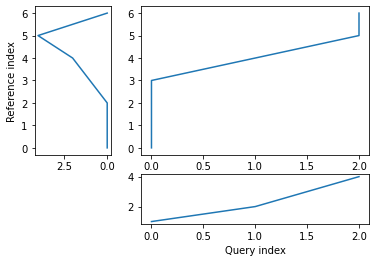

In [0]:
alignment.plot(type='threeway')

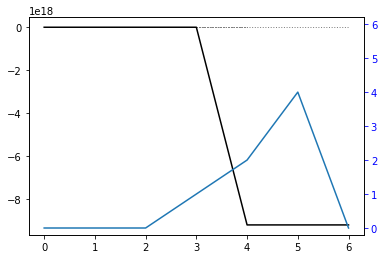

In [0]:
dtw(np.array([1,2,4,0]), np.array([0, 0, 0, 1, 2, 4, 0]), keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(4, "c")).plot(type="twoway",offset=-2)

In [0]:
rabinerJuangStepPattern(6, "c")

In [0]:
np.array([1,2,4])

array([1, 2, 4])